In [1]:
# seeds for reproducibility
from numpy.random import seed
seed(1337)
from tensorflow import set_random_seed
set_random_seed(1337)

import numpy as np
import os
import sys

# tensorflow properties
import tensorflow as tf
from tensorflow.keras import backend as K
from tensorflow.keras import optimizers
from tensorflow.keras.models import Model

# to implement functions at certain learning steps e.g. record weights
from tensorflow.keras.callbacks import LambdaCallback
from tensorflow.keras.callbacks import EarlyStopping


# imports from other files
import Callbacks
import binning
import model_selection
import data_selection
import classes
import plotting
import util
import info_plane

# Train model

In [2]:
set_name = "tishby"

X_train, X_test, y_train, y_test = data_selection.select_data(set_name, shuffle=True)

Loading tishby Data...


In [3]:
# object to record parameters
outputs = classes.Outputs()

nr_of_epochs = 1000
batch = 256
learning_r = 0.0004
record_all_flag = False
rec_test_flag = True

stop_early = False

In [4]:
# model 1 = model with leading ReLU
# model 2 = model with leading TanH
# model 3 = full ReLU
# model 4 = full TanH
# ...
model, architecture = model_selection.select_model(3, nr_of_epochs,
                                                   set_name, X_train.shape, y_train)

amount of classes 2
Input shape:  (3276, 12)  length:  2
Instructions for updating:
Colocations handled automatically by placer.


In [5]:
output_recording = LambdaCallback(on_epoch_end=lambda epoch,
                                   logs: Callbacks.record_activations(outputs, model,
                                                                      epoch, X_train,
                                                                      X_test, y_test,
                                                                      batch, 
                                                                      record_all_flag,
                                                                      rec_test_flag))
early_stopp = EarlyStopping(monitor='val_loss', patience=2, verbose=0, mode='auto')

In [6]:
adam = optimizers.Adam(lr=learning_r)
model.compile(loss="categorical_crossentropy",
              optimizer=adam,
              metrics=["categorical_crossentropy"])

if stop_early == True:
    history = model.fit(X_train, y_train, epochs=nr_of_epochs, batch_size=batch,
                        validation_split=0.2, callbacks = [output_recording, early_stopp])
else:
    history = model.fit(X_train, y_train, epochs=nr_of_epochs, batch_size=batch,
                        validation_split=0.2, callbacks = [output_recording])


Train on 2620 samples, validate on 656 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/1000
2620/2620 [==============================] - 0s 99us/sample - loss: 0.6843 - categorical_crossentropy: 0.6843 - val_loss: 0.6833 - val_categorical_crossentropy: 0.6833
Epoch 2/1000
2620/2620 [==============================] - 0s 24us/sample - loss: 0.6829 - categorical_crossentropy: 0.6829 - val_loss: 0.6819 - val_categorical_crossentropy: 0.6819
Epoch 3/1000
2620/2620 [==============================] - 0s 23us/sample - loss: 0.6814 - categorical_crossentropy: 0.6814 - val_loss: 0.6803 - val_categorical_crossentropy: 0.6803
Epoch 4/1000
2620/2620 [==============================] - 0s 25us/sample - loss: 0.6798 - categorical_crossentropy: 0.6798 - val_loss: 0.6786 - val_categorical_crossentropy: 0.6786
Epoch 5/1000
2620/2620 [==============================] - 0s 25us/sample - loss: 0.6780 - categorical_crossentropy: 0.6780 - val_loss: 0.6768 - val_categorical_crossentropy: 0.6768


2620/2620 [==============================] - 0s 7us/sample - loss: 0.4397 - categorical_crossentropy: 0.4397 - val_loss: 0.4351 - val_categorical_crossentropy: 0.4351
Epoch 45/1000
2620/2620 [==============================] - 0s 28us/sample - loss: 0.4347 - categorical_crossentropy: 0.4347 - val_loss: 0.4298 - val_categorical_crossentropy: 0.4298
Epoch 46/1000
2620/2620 [==============================] - 0s 6us/sample - loss: 0.4299 - categorical_crossentropy: 0.4299 - val_loss: 0.4258 - val_categorical_crossentropy: 0.4258
Epoch 47/1000
2620/2620 [==============================] - 0s 24us/sample - loss: 0.4256 - categorical_crossentropy: 0.4256 - val_loss: 0.4222 - val_categorical_crossentropy: 0.4222
Epoch 48/1000
2620/2620 [==============================] - 0s 6us/sample - loss: 0.4214 - categorical_crossentropy: 0.4214 - val_loss: 0.4176 - val_categorical_crossentropy: 0.4176
Epoch 49/1000
2620/2620 [==============================] - 0s 25us/sample - loss: 0.4169 - categorical_cros

2620/2620 [==============================] - 0s 26us/sample - loss: 0.3305 - categorical_crossentropy: 0.3305 - val_loss: 0.3380 - val_categorical_crossentropy: 0.3380
Epoch 90/1000
2620/2620 [==============================] - 0s 6us/sample - loss: 0.3287 - categorical_crossentropy: 0.3287 - val_loss: 0.3368 - val_categorical_crossentropy: 0.3368
Epoch 91/1000
2620/2620 [==============================] - 0s 26us/sample - loss: 0.3268 - categorical_crossentropy: 0.3268 - val_loss: 0.3349 - val_categorical_crossentropy: 0.3349
Epoch 92/1000
2620/2620 [==============================] - 0s 6us/sample - loss: 0.3256 - categorical_crossentropy: 0.3256 - val_loss: 0.3338 - val_categorical_crossentropy: 0.3338
Epoch 93/1000
2620/2620 [==============================] - 0s 26us/sample - loss: 0.3247 - categorical_crossentropy: 0.3247 - val_loss: 0.3341 - val_categorical_crossentropy: 0.3341
Epoch 94/1000
2620/2620 [==============================] - 0s 7us/sample - loss: 0.3230 - categorical_cros

2620/2620 [==============================] - 0s 7us/sample - loss: 0.2813 - categorical_crossentropy: 0.2813 - val_loss: 0.3006 - val_categorical_crossentropy: 0.3006
Epoch 135/1000
2620/2620 [==============================] - 0s 27us/sample - loss: 0.2798 - categorical_crossentropy: 0.2798 - val_loss: 0.3011 - val_categorical_crossentropy: 0.3011
Epoch 136/1000
2620/2620 [==============================] - 0s 7us/sample - loss: 0.2785 - categorical_crossentropy: 0.2785 - val_loss: 0.2982 - val_categorical_crossentropy: 0.2982
Epoch 137/1000
2620/2620 [==============================] - 0s 27us/sample - loss: 0.2777 - categorical_crossentropy: 0.2777 - val_loss: 0.2982 - val_categorical_crossentropy: 0.2982
Epoch 138/1000
2620/2620 [==============================] - 0s 6us/sample - loss: 0.2768 - categorical_crossentropy: 0.2768 - val_loss: 0.2975 - val_categorical_crossentropy: 0.2975
Epoch 139/1000
2620/2620 [==============================] - 0s 47us/sample - loss: 0.2762 - categorical

Epoch 179/1000
2620/2620 [==============================] - 0s 28us/sample - loss: 0.2427 - categorical_crossentropy: 0.2427 - val_loss: 0.2716 - val_categorical_crossentropy: 0.2716
Epoch 180/1000
2620/2620 [==============================] - 0s 7us/sample - loss: 0.2427 - categorical_crossentropy: 0.2427 - val_loss: 0.2725 - val_categorical_crossentropy: 0.2725
Epoch 181/1000
2620/2620 [==============================] - 0s 32us/sample - loss: 0.2415 - categorical_crossentropy: 0.2415 - val_loss: 0.2710 - val_categorical_crossentropy: 0.2710
Epoch 182/1000
2620/2620 [==============================] - 0s 7us/sample - loss: 0.2409 - categorical_crossentropy: 0.2409 - val_loss: 0.2714 - val_categorical_crossentropy: 0.2714
Epoch 183/1000
2620/2620 [==============================] - 0s 27us/sample - loss: 0.2405 - categorical_crossentropy: 0.2405 - val_loss: 0.2703 - val_categorical_crossentropy: 0.2703
Epoch 184/1000
2620/2620 [==============================] - 0s 7us/sample - loss: 0.240

Epoch 224/1000
2620/2620 [==============================] - 0s 7us/sample - loss: 0.2168 - categorical_crossentropy: 0.2168 - val_loss: 0.2557 - val_categorical_crossentropy: 0.2557
Epoch 225/1000
2620/2620 [==============================] - 0s 28us/sample - loss: 0.2172 - categorical_crossentropy: 0.2172 - val_loss: 0.2553 - val_categorical_crossentropy: 0.2553
Epoch 226/1000
2620/2620 [==============================] - 0s 9us/sample - loss: 0.2165 - categorical_crossentropy: 0.2165 - val_loss: 0.2541 - val_categorical_crossentropy: 0.2541
Epoch 227/1000
2620/2620 [==============================] - 0s 29us/sample - loss: 0.2157 - categorical_crossentropy: 0.2157 - val_loss: 0.2554 - val_categorical_crossentropy: 0.2554
Epoch 228/1000
2620/2620 [==============================] - 0s 7us/sample - loss: 0.2152 - categorical_crossentropy: 0.2152 - val_loss: 0.2539 - val_categorical_crossentropy: 0.2539
Epoch 229/1000
2620/2620 [==============================] - 0s 28us/sample - loss: 0.214

Epoch 269/1000
2620/2620 [==============================] - 0s 27us/sample - loss: 0.1962 - categorical_crossentropy: 0.1962 - val_loss: 0.2449 - val_categorical_crossentropy: 0.2449
Epoch 270/1000
2620/2620 [==============================] - 0s 6us/sample - loss: 0.1958 - categorical_crossentropy: 0.1958 - val_loss: 0.2445 - val_categorical_crossentropy: 0.2445
Epoch 271/1000
2620/2620 [==============================] - 0s 30us/sample - loss: 0.1952 - categorical_crossentropy: 0.1952 - val_loss: 0.2442 - val_categorical_crossentropy: 0.2442
Epoch 272/1000
2620/2620 [==============================] - 0s 6us/sample - loss: 0.1949 - categorical_crossentropy: 0.1949 - val_loss: 0.2444 - val_categorical_crossentropy: 0.2444
Epoch 273/1000
2620/2620 [==============================] - 0s 27us/sample - loss: 0.1947 - categorical_crossentropy: 0.1947 - val_loss: 0.2432 - val_categorical_crossentropy: 0.2432
Epoch 274/1000
2620/2620 [==============================] - 0s 6us/sample - loss: 0.195

Epoch 314/1000
2620/2620 [==============================] - 0s 6us/sample - loss: 0.1824 - categorical_crossentropy: 0.1824 - val_loss: 0.2380 - val_categorical_crossentropy: 0.2380
Epoch 315/1000
2620/2620 [==============================] - 0s 7us/sample - loss: 0.1828 - categorical_crossentropy: 0.1828 - val_loss: 0.2378 - val_categorical_crossentropy: 0.2378
Epoch 316/1000
2620/2620 [==============================] - 0s 6us/sample - loss: 0.1824 - categorical_crossentropy: 0.1824 - val_loss: 0.2369 - val_categorical_crossentropy: 0.2369
Epoch 317/1000
2620/2620 [==============================] - 0s 6us/sample - loss: 0.1810 - categorical_crossentropy: 0.1810 - val_loss: 0.2383 - val_categorical_crossentropy: 0.2383
Epoch 318/1000
2620/2620 [==============================] - 0s 6us/sample - loss: 0.1823 - categorical_crossentropy: 0.1823 - val_loss: 0.2367 - val_categorical_crossentropy: 0.2367
Epoch 319/1000
2620/2620 [==============================] - 0s 6us/sample - loss: 0.1809 -

Epoch 359/1000
2620/2620 [==============================] - 0s 6us/sample - loss: 0.1717 - categorical_crossentropy: 0.1717 - val_loss: 0.2323 - val_categorical_crossentropy: 0.2323
Epoch 360/1000
2620/2620 [==============================] - 0s 6us/sample - loss: 0.1717 - categorical_crossentropy: 0.1717 - val_loss: 0.2314 - val_categorical_crossentropy: 0.2314
Epoch 361/1000
2620/2620 [==============================] - 0s 31us/sample - loss: 0.1716 - categorical_crossentropy: 0.1716 - val_loss: 0.2323 - val_categorical_crossentropy: 0.2323
Epoch 362/1000
2620/2620 [==============================] - 0s 7us/sample - loss: 0.1716 - categorical_crossentropy: 0.1716 - val_loss: 0.2340 - val_categorical_crossentropy: 0.2340
Epoch 363/1000
2620/2620 [==============================] - 0s 6us/sample - loss: 0.1718 - categorical_crossentropy: 0.1718 - val_loss: 0.2319 - val_categorical_crossentropy: 0.2319
Epoch 364/1000
2620/2620 [==============================] - 0s 6us/sample - loss: 0.1707 

Epoch 404/1000
2620/2620 [==============================] - 0s 6us/sample - loss: 0.1634 - categorical_crossentropy: 0.1634 - val_loss: 0.2313 - val_categorical_crossentropy: 0.2313
Epoch 405/1000
2620/2620 [==============================] - 0s 6us/sample - loss: 0.1635 - categorical_crossentropy: 0.1635 - val_loss: 0.2311 - val_categorical_crossentropy: 0.2311
Epoch 406/1000
2620/2620 [==============================] - 0s 6us/sample - loss: 0.1634 - categorical_crossentropy: 0.1634 - val_loss: 0.2318 - val_categorical_crossentropy: 0.2318
Epoch 407/1000
2620/2620 [==============================] - 0s 6us/sample - loss: 0.1627 - categorical_crossentropy: 0.1627 - val_loss: 0.2310 - val_categorical_crossentropy: 0.2310
Epoch 408/1000
2620/2620 [==============================] - 0s 6us/sample - loss: 0.1629 - categorical_crossentropy: 0.1629 - val_loss: 0.2316 - val_categorical_crossentropy: 0.2316
Epoch 409/1000
2620/2620 [==============================] - 0s 6us/sample - loss: 0.1633 -

Epoch 449/1000
2620/2620 [==============================] - 0s 6us/sample - loss: 0.1567 - categorical_crossentropy: 0.1567 - val_loss: 0.2292 - val_categorical_crossentropy: 0.2292
Epoch 450/1000
2620/2620 [==============================] - 0s 6us/sample - loss: 0.1578 - categorical_crossentropy: 0.1578 - val_loss: 0.2284 - val_categorical_crossentropy: 0.2284
Epoch 451/1000
2620/2620 [==============================] - 0s 29us/sample - loss: 0.1566 - categorical_crossentropy: 0.1566 - val_loss: 0.2299 - val_categorical_crossentropy: 0.2299
Epoch 452/1000
2620/2620 [==============================] - 0s 6us/sample - loss: 0.1573 - categorical_crossentropy: 0.1573 - val_loss: 0.2279 - val_categorical_crossentropy: 0.2279
Epoch 453/1000
2620/2620 [==============================] - 0s 6us/sample - loss: 0.1560 - categorical_crossentropy: 0.1560 - val_loss: 0.2284 - val_categorical_crossentropy: 0.2284
Epoch 454/1000
2620/2620 [==============================] - 0s 7us/sample - loss: 0.1558 

Epoch 494/1000
2620/2620 [==============================] - 0s 7us/sample - loss: 0.1504 - categorical_crossentropy: 0.1504 - val_loss: 0.2262 - val_categorical_crossentropy: 0.2262
Epoch 495/1000
2620/2620 [==============================] - 0s 7us/sample - loss: 0.1500 - categorical_crossentropy: 0.1500 - val_loss: 0.2262 - val_categorical_crossentropy: 0.2262
Epoch 496/1000
2620/2620 [==============================] - 0s 7us/sample - loss: 0.1495 - categorical_crossentropy: 0.1495 - val_loss: 0.2270 - val_categorical_crossentropy: 0.2270
Epoch 497/1000
2620/2620 [==============================] - 0s 7us/sample - loss: 0.1496 - categorical_crossentropy: 0.1496 - val_loss: 0.2266 - val_categorical_crossentropy: 0.2266
Epoch 498/1000
2620/2620 [==============================] - 0s 8us/sample - loss: 0.1496 - categorical_crossentropy: 0.1496 - val_loss: 0.2280 - val_categorical_crossentropy: 0.2280
Epoch 499/1000
2620/2620 [==============================] - 0s 7us/sample - loss: 0.1493 -

Epoch 539/1000
2620/2620 [==============================] - 0s 8us/sample - loss: 0.1433 - categorical_crossentropy: 0.1433 - val_loss: 0.2252 - val_categorical_crossentropy: 0.2252
Epoch 540/1000
2620/2620 [==============================] - 0s 8us/sample - loss: 0.1431 - categorical_crossentropy: 0.1431 - val_loss: 0.2248 - val_categorical_crossentropy: 0.2248
Epoch 541/1000
2620/2620 [==============================] - 0s 8us/sample - loss: 0.1427 - categorical_crossentropy: 0.1427 - val_loss: 0.2259 - val_categorical_crossentropy: 0.2259
Epoch 542/1000
2620/2620 [==============================] - 0s 7us/sample - loss: 0.1425 - categorical_crossentropy: 0.1425 - val_loss: 0.2245 - val_categorical_crossentropy: 0.2245
Epoch 543/1000
2620/2620 [==============================] - 0s 7us/sample - loss: 0.1423 - categorical_crossentropy: 0.1423 - val_loss: 0.2239 - val_categorical_crossentropy: 0.2239
Epoch 544/1000
2620/2620 [==============================] - 0s 7us/sample - loss: 0.1424 -

2620/2620 [==============================] - 0s 6us/sample - loss: 0.1366 - categorical_crossentropy: 0.1366 - val_loss: 0.2221 - val_categorical_crossentropy: 0.2221
Epoch 585/1000
2620/2620 [==============================] - 0s 7us/sample - loss: 0.1361 - categorical_crossentropy: 0.1361 - val_loss: 0.2215 - val_categorical_crossentropy: 0.2215
Epoch 586/1000
2620/2620 [==============================] - 0s 8us/sample - loss: 0.1364 - categorical_crossentropy: 0.1364 - val_loss: 0.2221 - val_categorical_crossentropy: 0.2221
Epoch 587/1000
2620/2620 [==============================] - 0s 14us/sample - loss: 0.1365 - categorical_crossentropy: 0.1365 - val_loss: 0.2207 - val_categorical_crossentropy: 0.2207
Epoch 588/1000
2620/2620 [==============================] - 0s 11us/sample - loss: 0.1362 - categorical_crossentropy: 0.1362 - val_loss: 0.2220 - val_categorical_crossentropy: 0.2220
Epoch 589/1000
2620/2620 [==============================] - 0s 7us/sample - loss: 0.1354 - categorical_

2620/2620 [==============================] - 0s 8us/sample - loss: 0.1280 - categorical_crossentropy: 0.1280 - val_loss: 0.2160 - val_categorical_crossentropy: 0.2160
Epoch 630/1000
2620/2620 [==============================] - 0s 7us/sample - loss: 0.1278 - categorical_crossentropy: 0.1278 - val_loss: 0.2135 - val_categorical_crossentropy: 0.2135
Epoch 631/1000
2620/2620 [==============================] - 0s 7us/sample - loss: 0.1276 - categorical_crossentropy: 0.1276 - val_loss: 0.2136 - val_categorical_crossentropy: 0.2136
Epoch 632/1000
2620/2620 [==============================] - 0s 7us/sample - loss: 0.1274 - categorical_crossentropy: 0.1274 - val_loss: 0.2127 - val_categorical_crossentropy: 0.2127
Epoch 633/1000
2620/2620 [==============================] - 0s 7us/sample - loss: 0.1269 - categorical_crossentropy: 0.1269 - val_loss: 0.2135 - val_categorical_crossentropy: 0.2135
Epoch 634/1000
2620/2620 [==============================] - 0s 7us/sample - loss: 0.1266 - categorical_cr

2620/2620 [==============================] - 0s 9us/sample - loss: 0.1164 - categorical_crossentropy: 0.1164 - val_loss: 0.2051 - val_categorical_crossentropy: 0.2051
Epoch 675/1000
2620/2620 [==============================] - 0s 8us/sample - loss: 0.1162 - categorical_crossentropy: 0.1162 - val_loss: 0.2059 - val_categorical_crossentropy: 0.2059
Epoch 676/1000
2620/2620 [==============================] - 0s 8us/sample - loss: 0.1159 - categorical_crossentropy: 0.1159 - val_loss: 0.2063 - val_categorical_crossentropy: 0.2063
Epoch 677/1000
2620/2620 [==============================] - 0s 8us/sample - loss: 0.1165 - categorical_crossentropy: 0.1165 - val_loss: 0.2050 - val_categorical_crossentropy: 0.2050
Epoch 678/1000
2620/2620 [==============================] - 0s 8us/sample - loss: 0.1161 - categorical_crossentropy: 0.1161 - val_loss: 0.2058 - val_categorical_crossentropy: 0.2058
Epoch 679/1000
2620/2620 [==============================] - 0s 8us/sample - loss: 0.1150 - categorical_cr

2620/2620 [==============================] - 0s 10us/sample - loss: 0.1063 - categorical_crossentropy: 0.1063 - val_loss: 0.1957 - val_categorical_crossentropy: 0.1957
Epoch 720/1000
2620/2620 [==============================] - 0s 7us/sample - loss: 0.1066 - categorical_crossentropy: 0.1066 - val_loss: 0.1947 - val_categorical_crossentropy: 0.1947
Epoch 721/1000
2620/2620 [==============================] - 0s 8us/sample - loss: 0.1061 - categorical_crossentropy: 0.1061 - val_loss: 0.1942 - val_categorical_crossentropy: 0.1942
Epoch 722/1000
2620/2620 [==============================] - 0s 7us/sample - loss: 0.1060 - categorical_crossentropy: 0.1060 - val_loss: 0.1941 - val_categorical_crossentropy: 0.1941
Epoch 723/1000
2620/2620 [==============================] - 0s 7us/sample - loss: 0.1060 - categorical_crossentropy: 0.1060 - val_loss: 0.1942 - val_categorical_crossentropy: 0.1942
Epoch 724/1000
2620/2620 [==============================] - 0s 7us/sample - loss: 0.1058 - categorical_c

2620/2620 [==============================] - 0s 7us/sample - loss: 0.0969 - categorical_crossentropy: 0.0969 - val_loss: 0.1831 - val_categorical_crossentropy: 0.1831
Epoch 765/1000
2620/2620 [==============================] - 0s 7us/sample - loss: 0.0972 - categorical_crossentropy: 0.0972 - val_loss: 0.1832 - val_categorical_crossentropy: 0.1832
Epoch 766/1000
2620/2620 [==============================] - 0s 7us/sample - loss: 0.0989 - categorical_crossentropy: 0.0989 - val_loss: 0.1830 - val_categorical_crossentropy: 0.1830
Epoch 767/1000
2620/2620 [==============================] - 0s 7us/sample - loss: 0.0972 - categorical_crossentropy: 0.0972 - val_loss: 0.1826 - val_categorical_crossentropy: 0.1826
Epoch 768/1000
2620/2620 [==============================] - 0s 7us/sample - loss: 0.0960 - categorical_crossentropy: 0.0960 - val_loss: 0.1827 - val_categorical_crossentropy: 0.1827
Epoch 769/1000
2620/2620 [==============================] - 0s 7us/sample - loss: 0.0960 - categorical_cr

2620/2620 [==============================] - 0s 11us/sample - loss: 0.0887 - categorical_crossentropy: 0.0887 - val_loss: 0.1758 - val_categorical_crossentropy: 0.1758
Epoch 810/1000
2620/2620 [==============================] - 0s 9us/sample - loss: 0.0895 - categorical_crossentropy: 0.0895 - val_loss: 0.1756 - val_categorical_crossentropy: 0.1756
Epoch 811/1000
2620/2620 [==============================] - 0s 9us/sample - loss: 0.0889 - categorical_crossentropy: 0.0889 - val_loss: 0.1745 - val_categorical_crossentropy: 0.1745
Epoch 812/1000
2620/2620 [==============================] - 0s 9us/sample - loss: 0.0888 - categorical_crossentropy: 0.0888 - val_loss: 0.1755 - val_categorical_crossentropy: 0.1755
Epoch 813/1000
2620/2620 [==============================] - 0s 8us/sample - loss: 0.0878 - categorical_crossentropy: 0.0878 - val_loss: 0.1752 - val_categorical_crossentropy: 0.1752
Epoch 814/1000
2620/2620 [==============================] - 0s 7us/sample - loss: 0.0878 - categorical_c

2620/2620 [==============================] - 0s 9us/sample - loss: 0.0836 - categorical_crossentropy: 0.0836 - val_loss: 0.1721 - val_categorical_crossentropy: 0.1721
Epoch 855/1000
2620/2620 [==============================] - 0s 10us/sample - loss: 0.0813 - categorical_crossentropy: 0.0813 - val_loss: 0.1711 - val_categorical_crossentropy: 0.1711
Epoch 856/1000
2620/2620 [==============================] - 0s 8us/sample - loss: 0.0820 - categorical_crossentropy: 0.0820 - val_loss: 0.1704 - val_categorical_crossentropy: 0.1704
Epoch 857/1000
2620/2620 [==============================] - 0s 8us/sample - loss: 0.0813 - categorical_crossentropy: 0.0813 - val_loss: 0.1716 - val_categorical_crossentropy: 0.1716
Epoch 858/1000
2620/2620 [==============================] - 0s 11us/sample - loss: 0.0813 - categorical_crossentropy: 0.0813 - val_loss: 0.1725 - val_categorical_crossentropy: 0.1725
Epoch 859/1000
2620/2620 [==============================] - 0s 9us/sample - loss: 0.0813 - categorical_

2620/2620 [==============================] - 0s 9us/sample - loss: 0.0762 - categorical_crossentropy: 0.0762 - val_loss: 0.1733 - val_categorical_crossentropy: 0.1733
Epoch 900/1000
2620/2620 [==============================] - 0s 8us/sample - loss: 0.0770 - categorical_crossentropy: 0.0770 - val_loss: 0.1729 - val_categorical_crossentropy: 0.1729
Epoch 901/1000
2620/2620 [==============================] - 0s 43us/sample - loss: 0.0766 - categorical_crossentropy: 0.0766 - val_loss: 0.1734 - val_categorical_crossentropy: 0.1734
Epoch 902/1000
2620/2620 [==============================] - 0s 10us/sample - loss: 0.0756 - categorical_crossentropy: 0.0756 - val_loss: 0.1739 - val_categorical_crossentropy: 0.1739
Epoch 903/1000
2620/2620 [==============================] - 0s 9us/sample - loss: 0.0769 - categorical_crossentropy: 0.0769 - val_loss: 0.1735 - val_categorical_crossentropy: 0.1735
Epoch 904/1000
2620/2620 [==============================] - 0s 8us/sample - loss: 0.0761 - categorical_

2620/2620 [==============================] - 0s 7us/sample - loss: 0.0729 - categorical_crossentropy: 0.0729 - val_loss: 0.1742 - val_categorical_crossentropy: 0.1742
Epoch 945/1000
2620/2620 [==============================] - 0s 6us/sample - loss: 0.0719 - categorical_crossentropy: 0.0719 - val_loss: 0.1750 - val_categorical_crossentropy: 0.1750
Epoch 946/1000
2620/2620 [==============================] - 0s 7us/sample - loss: 0.0724 - categorical_crossentropy: 0.0724 - val_loss: 0.1738 - val_categorical_crossentropy: 0.1738
Epoch 947/1000
2620/2620 [==============================] - 0s 7us/sample - loss: 0.0719 - categorical_crossentropy: 0.0719 - val_loss: 0.1736 - val_categorical_crossentropy: 0.1736
Epoch 948/1000
2620/2620 [==============================] - 0s 7us/sample - loss: 0.0716 - categorical_crossentropy: 0.0716 - val_loss: 0.1743 - val_categorical_crossentropy: 0.1743
Epoch 949/1000
2620/2620 [==============================] - 0s 7us/sample - loss: 0.0716 - categorical_cr

2620/2620 [==============================] - 0s 7us/sample - loss: 0.0692 - categorical_crossentropy: 0.0692 - val_loss: 0.1764 - val_categorical_crossentropy: 0.1764
Epoch 990/1000
2620/2620 [==============================] - 0s 8us/sample - loss: 0.0697 - categorical_crossentropy: 0.0697 - val_loss: 0.1765 - val_categorical_crossentropy: 0.1765
Epoch 991/1000
2620/2620 [==============================] - 0s 7us/sample - loss: 0.0686 - categorical_crossentropy: 0.0686 - val_loss: 0.1753 - val_categorical_crossentropy: 0.1753
Epoch 992/1000
2620/2620 [==============================] - 0s 6us/sample - loss: 0.0681 - categorical_crossentropy: 0.0681 - val_loss: 0.1752 - val_categorical_crossentropy: 0.1752
Epoch 993/1000
2620/2620 [==============================] - 0s 6us/sample - loss: 0.0682 - categorical_crossentropy: 0.0682 - val_loss: 0.1747 - val_categorical_crossentropy: 0.1747
Epoch 994/1000
2620/2620 [==============================] - 0s 7us/sample - loss: 0.0678 - categorical_cr

# Par Area

In [7]:
import timeit
import multiprocessing
from joblib import Parallel, delayed
NUM_CORES = multiprocessing.cpu_count()

# Timing Area

In [8]:
common_name = architecture + "_lr_" + str(learning_r) + "_batchsize_" + str(batch)

color_list = ["red", "blue", "green", "orange", "purple",
              "brown", "pink", "teal", "goldenrod"]

bin_amount = 0.07
bin_size_or_nr=True
show_flag = True
save_flag = False

In [9]:
def do_this():
    est_type_flag = 1
    info_plane.create_infoplane(common_name, X_train, y_train, outputs,
                                est_type_flag, color_list, bin_amount,
                                bin_size_or_nr, show_flag=True, separate_flag = False,
                                save_flag=False, par_flag=True)
def do_thisb():
    est_type_flag = 1
    info_plane.create_infoplane(common_name, X_train, y_train, outputs,
                                est_type_flag, color_list, bin_amount,
                                bin_size_or_nr, show_flag=True, separate_flag = False,
                                save_flag=False, par_flag=False)
    
def do_this2():
    est_type_flag = 2
    info_plane.create_infoplane(common_name, X_train, y_train, outputs,
                                est_type_flag, color_list, bin_amount,
                                bin_size_or_nr, show_flag=True, separate_flag = False,
                                save_flag=False, par_flag=True)
    
def do_this2b():
    est_type_flag = 2
    info_plane.create_infoplane(common_name, X_train, y_train, outputs,
                                est_type_flag, color_list, bin_amount,
                                bin_size_or_nr, show_flag=True, separate_flag = False,
                                save_flag=False, par_flag=False)
    
def do_this3():
    est_type_flag = 3
    info_plane.create_infoplane(common_name, X_train, y_train, outputs,
                                est_type_flag, color_list, bin_amount,
                                bin_size_or_nr, show_flag=True, separate_flag = False,
                                save_flag=False, par_flag=True)

def do_this3b():
    est_type_flag = 3
    info_plane.create_infoplane(common_name, X_train, y_train, outputs,
                                est_type_flag, color_list, bin_amount,
                                bin_size_or_nr, show_flag=True, separate_flag = False,
                                save_flag=False, par_flag=False)    
    
def do_this4():
    est_type_flag = 4
    info_plane.create_infoplane(common_name, X_train, y_train, outputs,
                                est_type_flag, color_list, bin_amount,
                                bin_size_or_nr, show_flag=True, separate_flag = False,
                                save_flag=False, par_flag=True)

def do_this4b():
    est_type_flag = 4
    info_plane.create_infoplane(common_name, X_train, y_train, outputs,
                                est_type_flag, color_list, bin_amount,
                                bin_size_or_nr, show_flag=True, separate_flag = False,
                                save_flag=False, par_flag=False)
    
def do_this5():
    est_type_flag = 5
    info_plane.create_infoplane(common_name, X_train, y_train, outputs,
                                est_type_flag, color_list, bin_amount,
                                bin_size_or_nr, show_flag=True, separate_flag = False,
                                save_flag=False, par_flag=True)

def do_this5b():
    est_type_flag = 5
    info_plane.create_infoplane(common_name, X_train, y_train, outputs,
                                est_type_flag, color_list, bin_amount,
                                bin_size_or_nr, show_flag=True, separate_flag = False,
                                save_flag=False, par_flag=False)

def do_this6():
    est_type_flag = 6
    info_plane.create_infoplane(common_name, X_train, y_train, outputs,
                                est_type_flag, color_list, bin_amount,
                                bin_size_or_nr, show_flag=True, separate_flag = False,
                                save_flag=False, par_flag=True)

def do_this6b():
    est_type_flag = 6
    info_plane.create_infoplane(common_name, X_train, y_train, outputs,
                                est_type_flag, color_list, bin_amount,
                                bin_size_or_nr, show_flag=True, separate_flag = False,
                                save_flag=False, par_flag=False)
    
def do_this7():
    est_type_flag = 7
    info_plane.create_infoplane(common_name, X_train, y_train, outputs,
                                est_type_flag, color_list, bin_amount,
                                bin_size_or_nr, show_flag=True, separate_flag = False,
                                save_flag=False, par_flag=True)

def do_this7b():
    est_type_flag = 7
    info_plane.create_infoplane(common_name, X_train, y_train, outputs,
                                est_type_flag, color_list, bin_amount,
                                bin_size_or_nr, show_flag=True, separate_flag = False,
                                save_flag=False, par_flag=False)
         
        

Starting EDGE calculation for MI in parallel
calculated EDGE MI_X in parallel
calculated EDGE MI_Y in parallel
creating info plane layer view plot


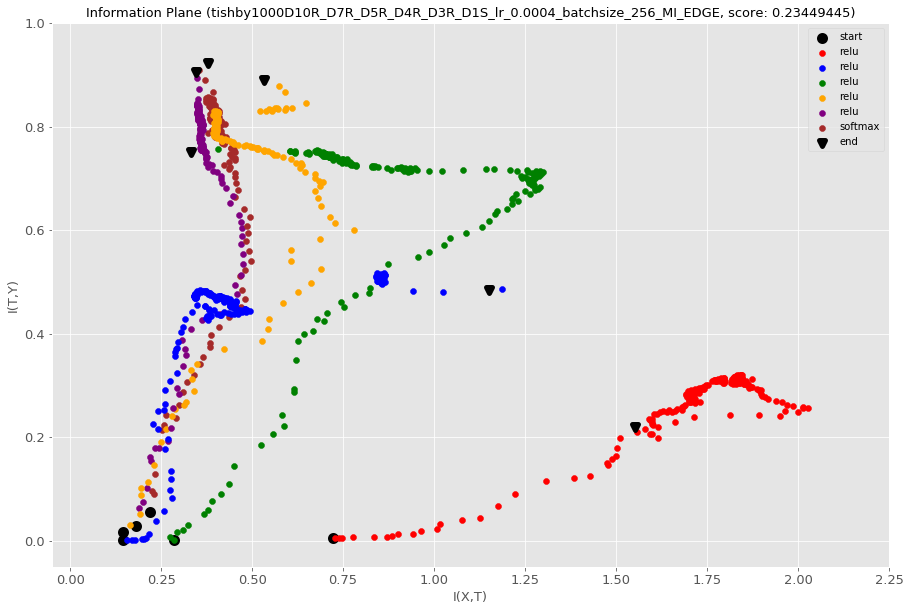

creating info plane epoch view plot


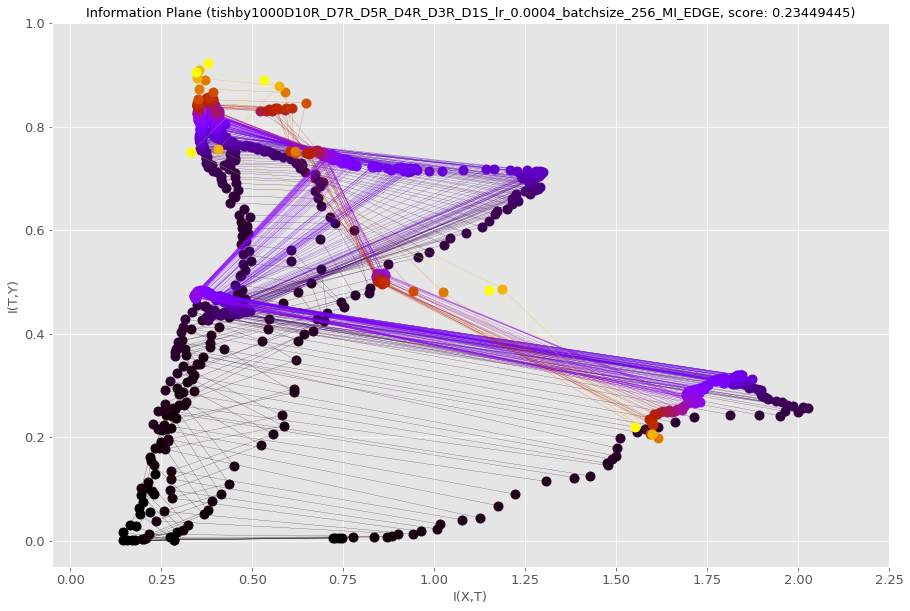

Creating combinationview plot


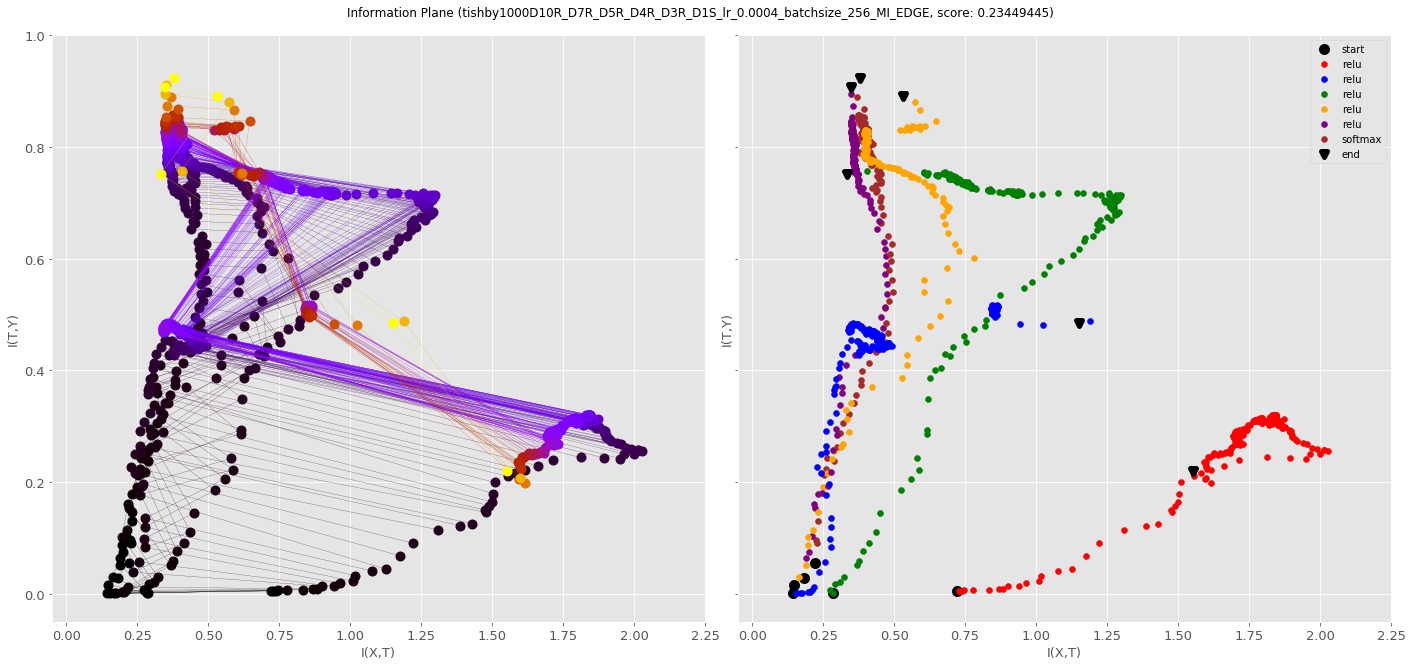

796.4286276996136

In [10]:
#EDGE par
timeit.timeit(do_this2, number = 1)

calculated EDGE MI_X and MI_Y procedural for epoch: 0
calculated EDGE MI_X and MI_Y procedural for epoch: 1
calculated EDGE MI_X and MI_Y procedural for epoch: 2
calculated EDGE MI_X and MI_Y procedural for epoch: 3
calculated EDGE MI_X and MI_Y procedural for epoch: 4
calculated EDGE MI_X and MI_Y procedural for epoch: 5
calculated EDGE MI_X and MI_Y procedural for epoch: 6
calculated EDGE MI_X and MI_Y procedural for epoch: 7
calculated EDGE MI_X and MI_Y procedural for epoch: 8
calculated EDGE MI_X and MI_Y procedural for epoch: 9
calculated EDGE MI_X and MI_Y procedural for epoch: 10
calculated EDGE MI_X and MI_Y procedural for epoch: 11
calculated EDGE MI_X and MI_Y procedural for epoch: 12
calculated EDGE MI_X and MI_Y procedural for epoch: 13
calculated EDGE MI_X and MI_Y procedural for epoch: 14
calculated EDGE MI_X and MI_Y procedural for epoch: 15
calculated EDGE MI_X and MI_Y procedural for epoch: 16
calculated EDGE MI_X and MI_Y procedural for epoch: 17
calculated EDGE MI_X

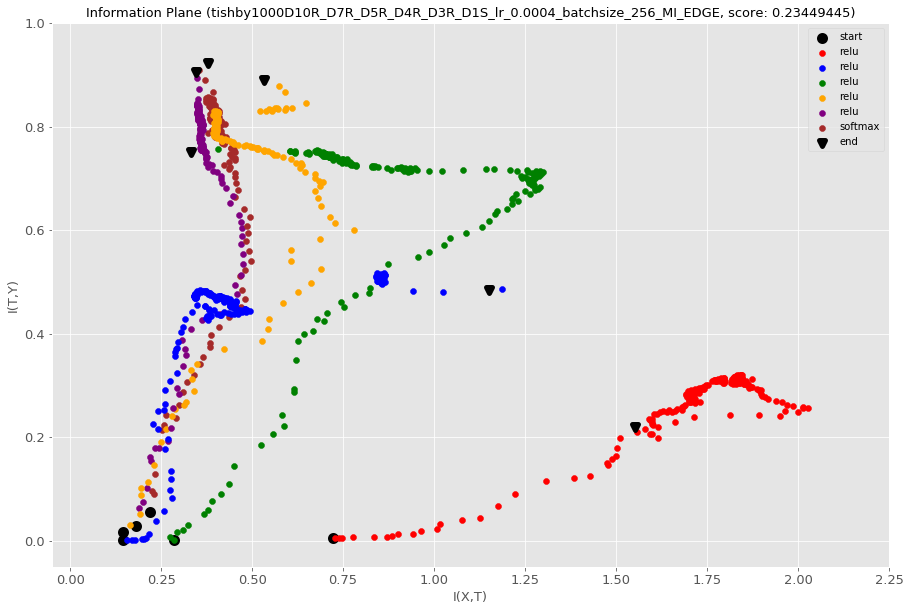

creating info plane epoch view plot


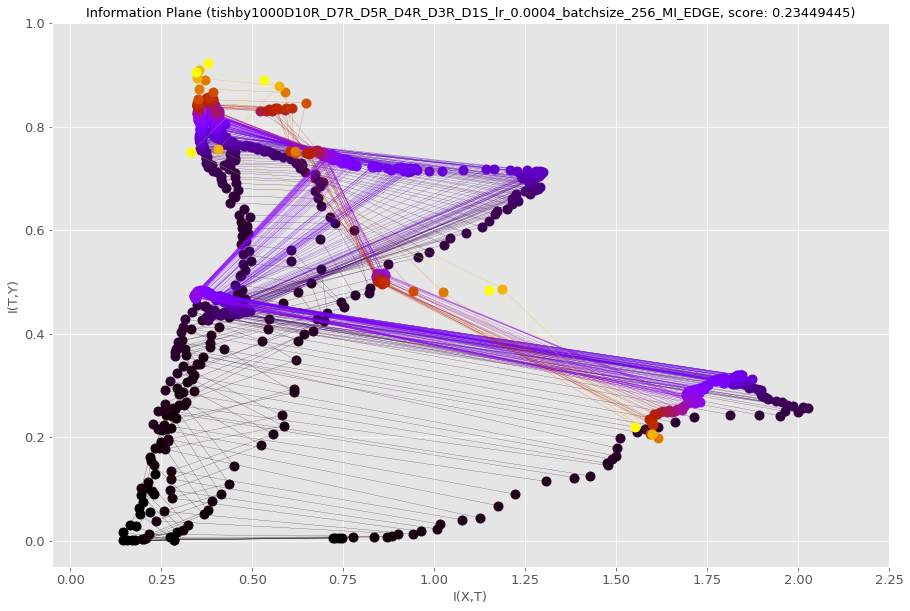

Creating combinationview plot


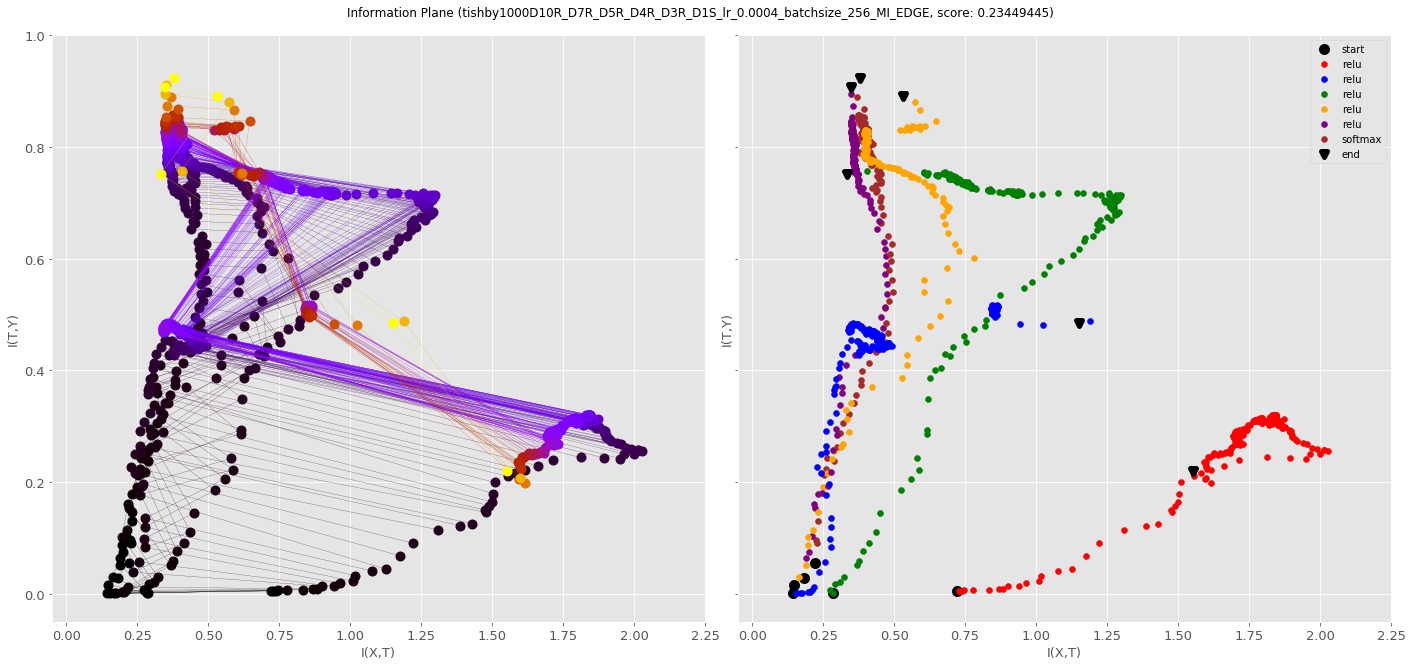

2309.4978942787275

In [11]:
# EDGE proc
timeit.timeit(do_this2b, number = 1)

Starting Kolchinsky calculation for MI in parallel
creating info plane layer view plot


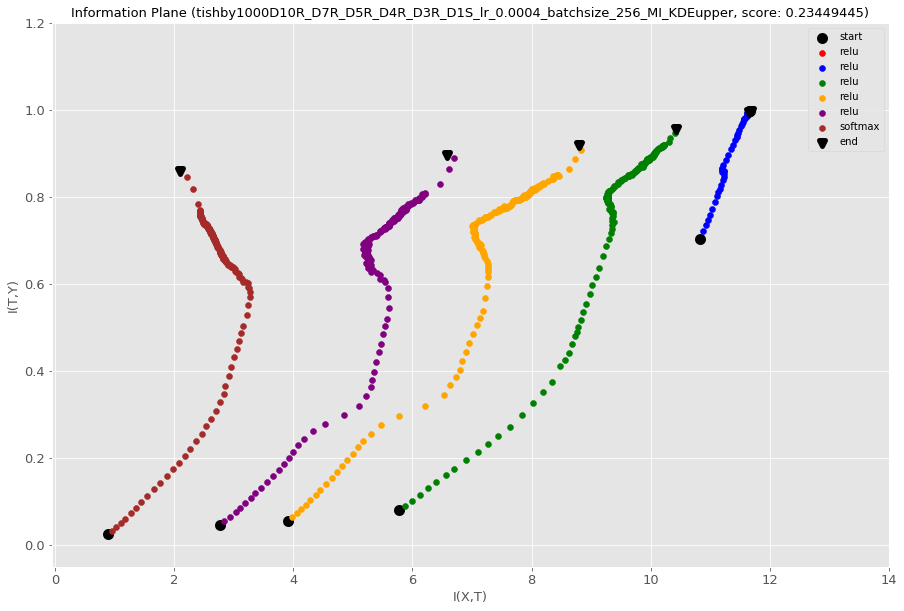

creating info plane epoch view plot


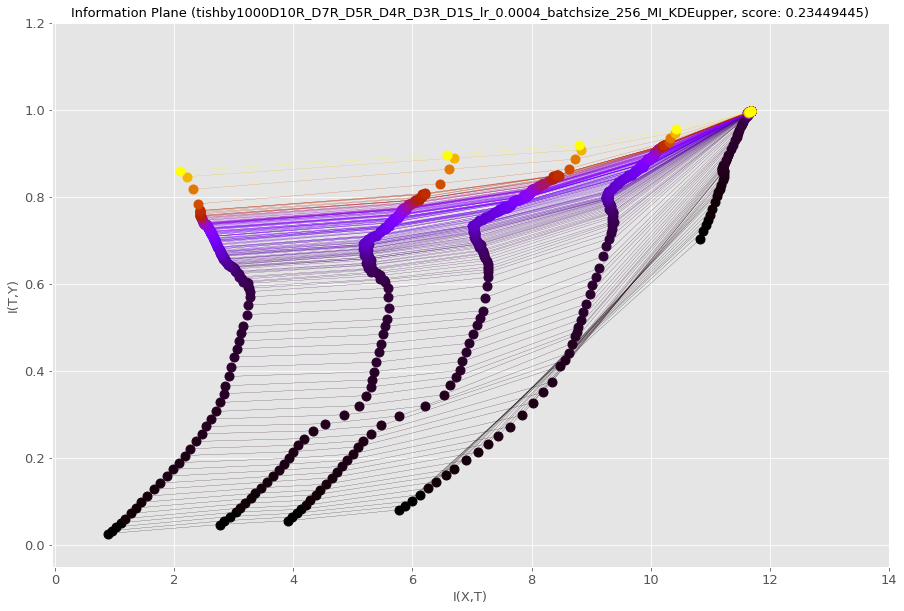

Creating combinationview plot


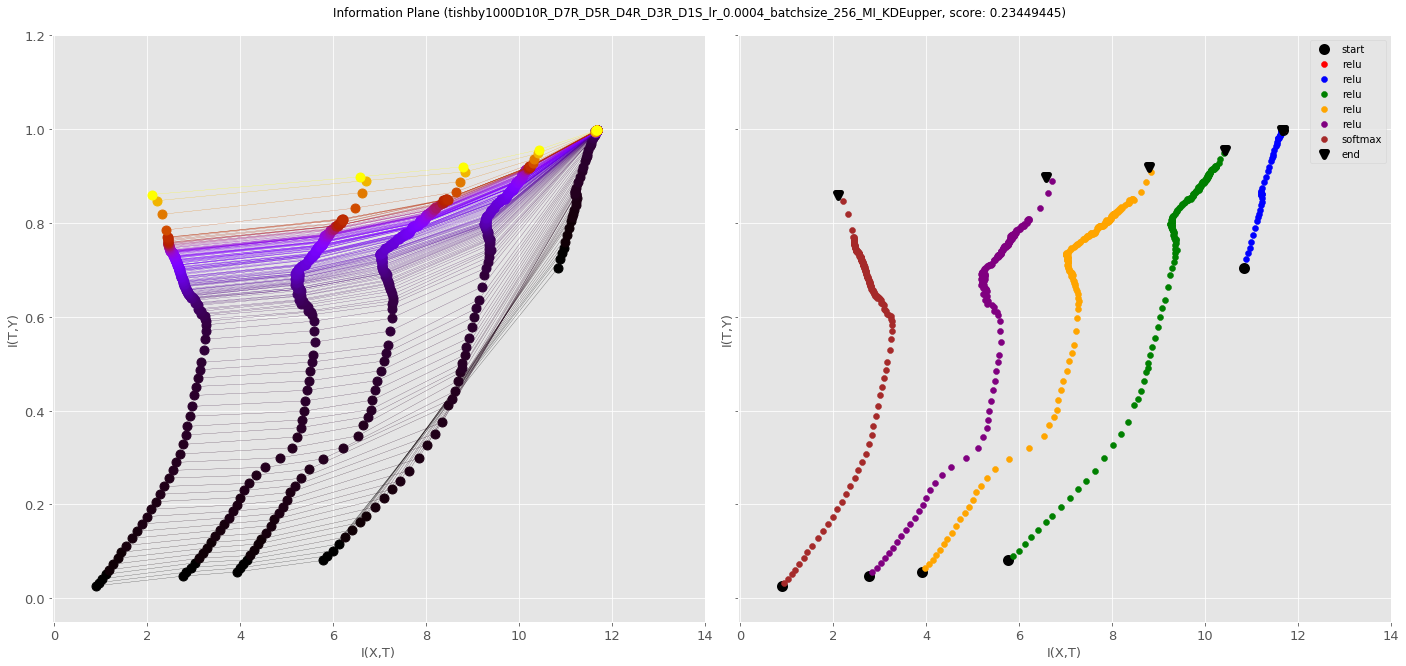

1211.8627281081863

In [12]:
# KDE par
timeit.timeit(do_this3, number = 1)

calculated KDE MI_X and MI_Y for epoch: 0
calculated KDE MI_X and MI_Y for epoch: 1
calculated KDE MI_X and MI_Y for epoch: 2
calculated KDE MI_X and MI_Y for epoch: 3
calculated KDE MI_X and MI_Y for epoch: 4
calculated KDE MI_X and MI_Y for epoch: 5
calculated KDE MI_X and MI_Y for epoch: 6
calculated KDE MI_X and MI_Y for epoch: 7
calculated KDE MI_X and MI_Y for epoch: 8
calculated KDE MI_X and MI_Y for epoch: 9
calculated KDE MI_X and MI_Y for epoch: 10
calculated KDE MI_X and MI_Y for epoch: 11
calculated KDE MI_X and MI_Y for epoch: 12
calculated KDE MI_X and MI_Y for epoch: 13
calculated KDE MI_X and MI_Y for epoch: 14
calculated KDE MI_X and MI_Y for epoch: 15
calculated KDE MI_X and MI_Y for epoch: 16
calculated KDE MI_X and MI_Y for epoch: 17
calculated KDE MI_X and MI_Y for epoch: 18
calculated KDE MI_X and MI_Y for epoch: 19
calculated KDE MI_X and MI_Y for epoch: 20
calculated KDE MI_X and MI_Y for epoch: 21
calculated KDE MI_X and MI_Y for epoch: 22
calculated KDE MI_X a

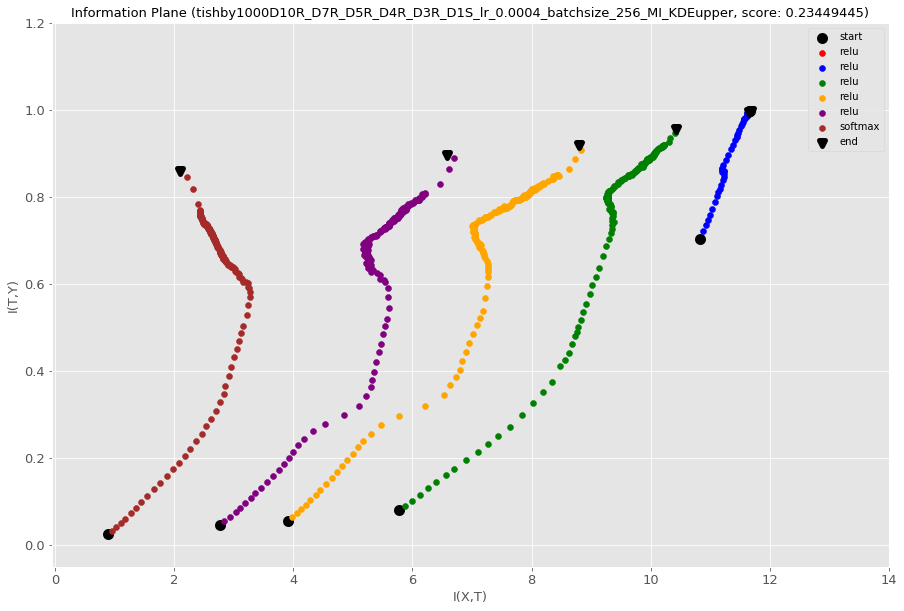

creating info plane epoch view plot


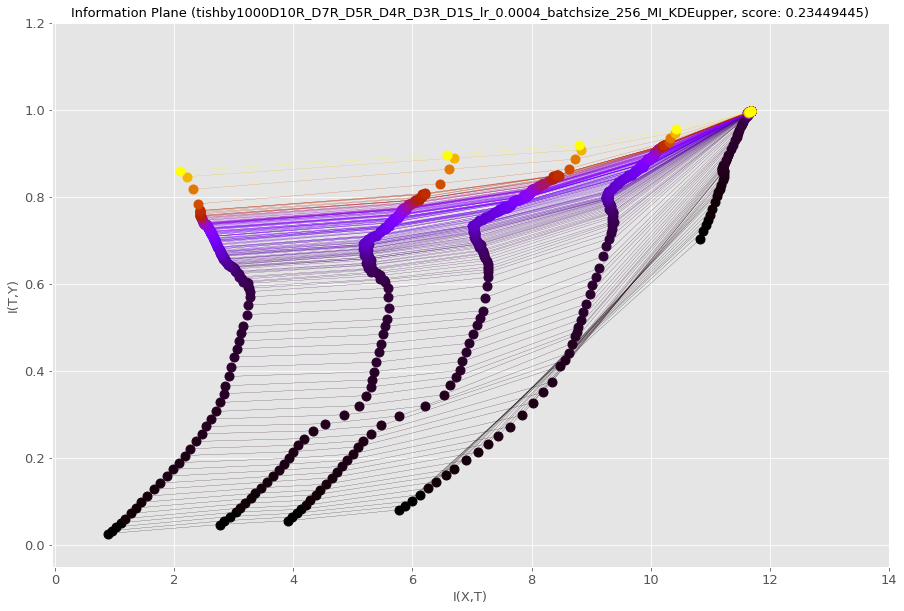

Creating combinationview plot


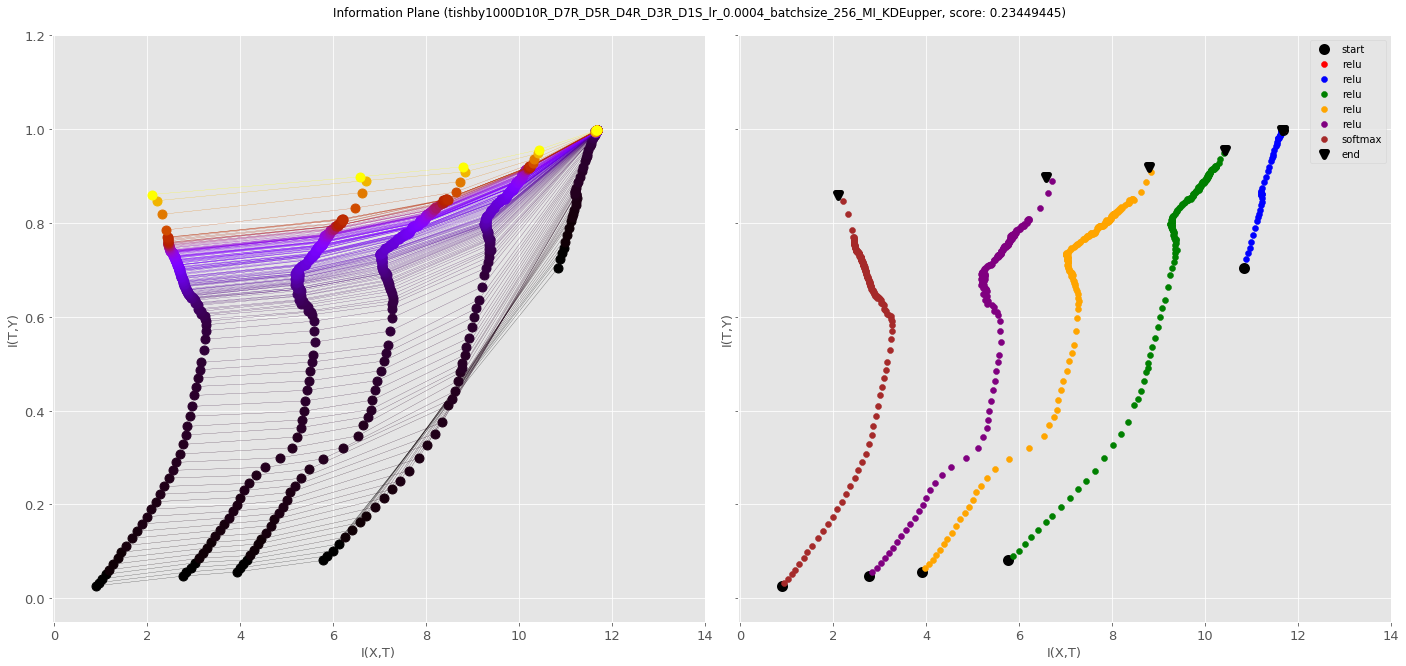

502.5629928559065

In [13]:
# KDE proc
timeit.timeit(do_this3b, number = 1)

o max:  {0: 3.8254387, 1: 5.169929, 2: 5.3712606, 3: 7.4320946, 4: 13.396354, 5: 1.0}
o min:  {0: 0.0, 1: 0.0, 2: 0.0, 3: 0.0, 4: 0.0, 5: 4.6855864e-22}
X and Y MI:  0.9976734295143714 , X Entropy:  11.677719641641012
MI for epoch  0  is being calculated for  0.07  bins
MI for epoch  1  is being calculated for  0.07  bins
MI for epoch  2  is being calculated for  0.07  bins
MI for epoch  3  is being calculated for  0.07  bins
MI for epoch  4  is being calculated for  0.07  bins
MI for epoch  5  is being calculated for  0.07  bins
MI for epoch  6  is being calculated for  0.07  bins
MI for epoch  7  is being calculated for  0.07  bins
MI for epoch  8  is being calculated for  0.07  bins
MI for epoch  9  is being calculated for  0.07  bins
MI for epoch  10  is being calculated for  0.07  bins
MI for epoch  11  is being calculated for  0.07  bins
MI for epoch  12  is being calculated for  0.07  bins
MI for epoch  13  is being calculated for  0.07  bins
MI for epoch  14  is being calculate

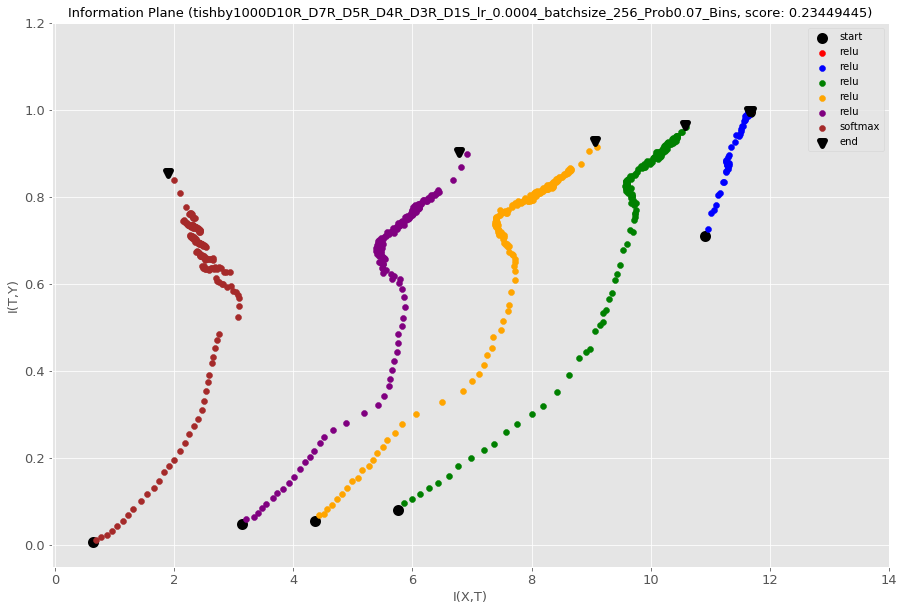

creating info plane epoch view plot


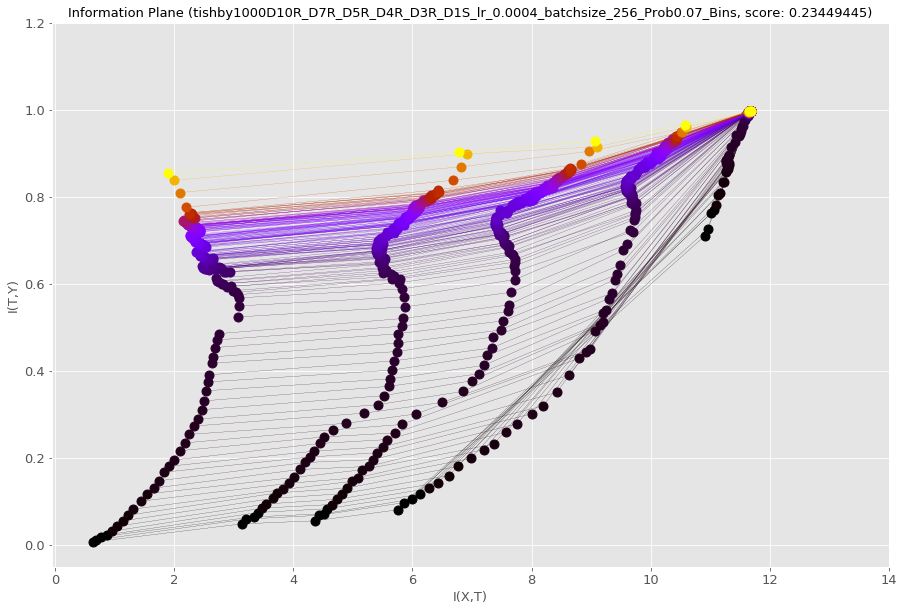

Creating combinationview plot


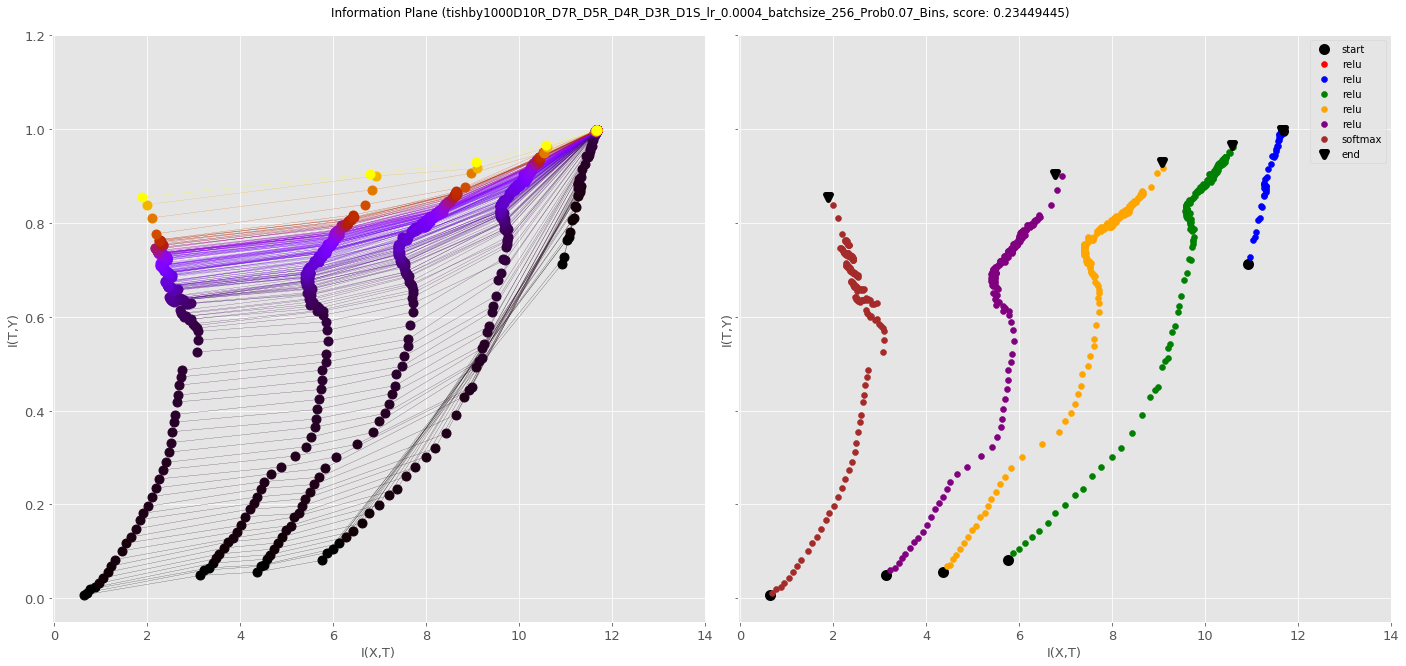

370.4857563562691

In [14]:
# binning par
timeit.timeit(do_this, number = 1)

o max:  {0: 3.8254387, 1: 5.169929, 2: 5.3712606, 3: 7.4320946, 4: 13.396354, 5: 1.0}
o min:  {0: 0.0, 1: 0.0, 2: 0.0, 3: 0.0, 4: 0.0, 5: 4.6855864e-22}
X and Y MI:  0.9976734295143714 , X Entropy:  11.677719641641012
MI for epoch  0  is being calculated for  0.07  bins
MI for epoch  1  is being calculated for  0.07  bins
MI for epoch  2  is being calculated for  0.07  bins
MI for epoch  3  is being calculated for  0.07  bins
MI for epoch  4  is being calculated for  0.07  bins
MI for epoch  5  is being calculated for  0.07  bins
MI for epoch  6  is being calculated for  0.07  bins
MI for epoch  7  is being calculated for  0.07  bins
MI for epoch  8  is being calculated for  0.07  bins
MI for epoch  9  is being calculated for  0.07  bins
MI for epoch  10  is being calculated for  0.07  bins
MI for epoch  11  is being calculated for  0.07  bins
MI for epoch  12  is being calculated for  0.07  bins
MI for epoch  13  is being calculated for  0.07  bins
MI for epoch  14  is being calculate

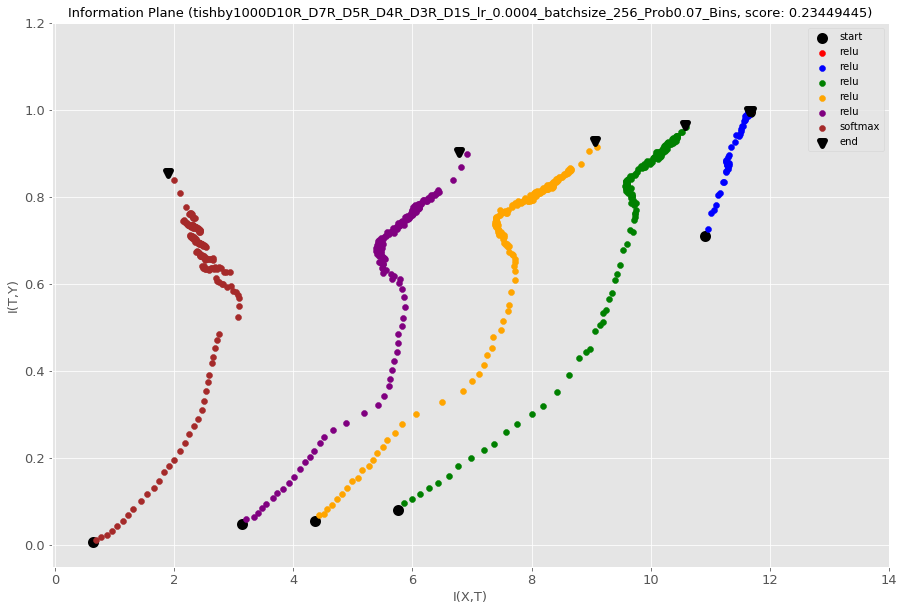

creating info plane epoch view plot


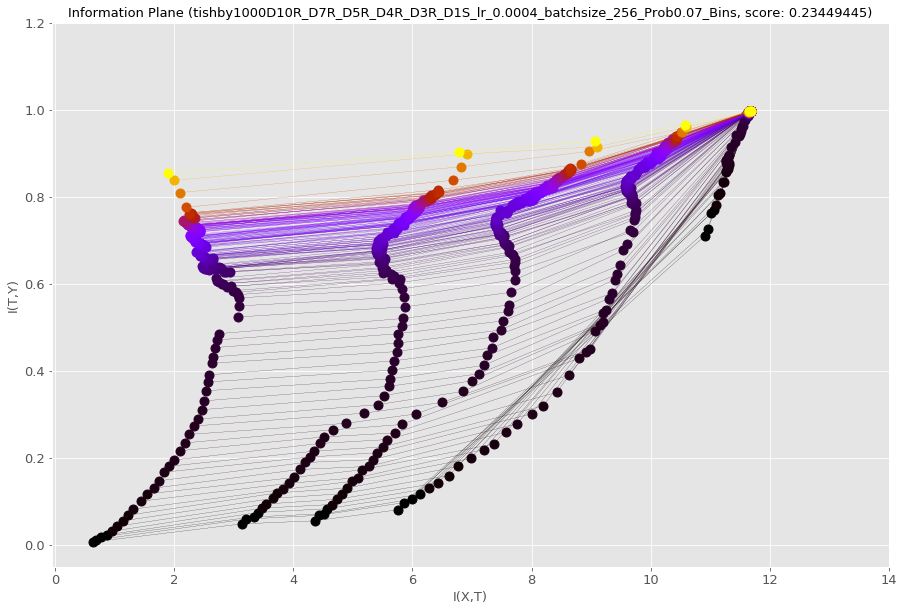

Creating combinationview plot


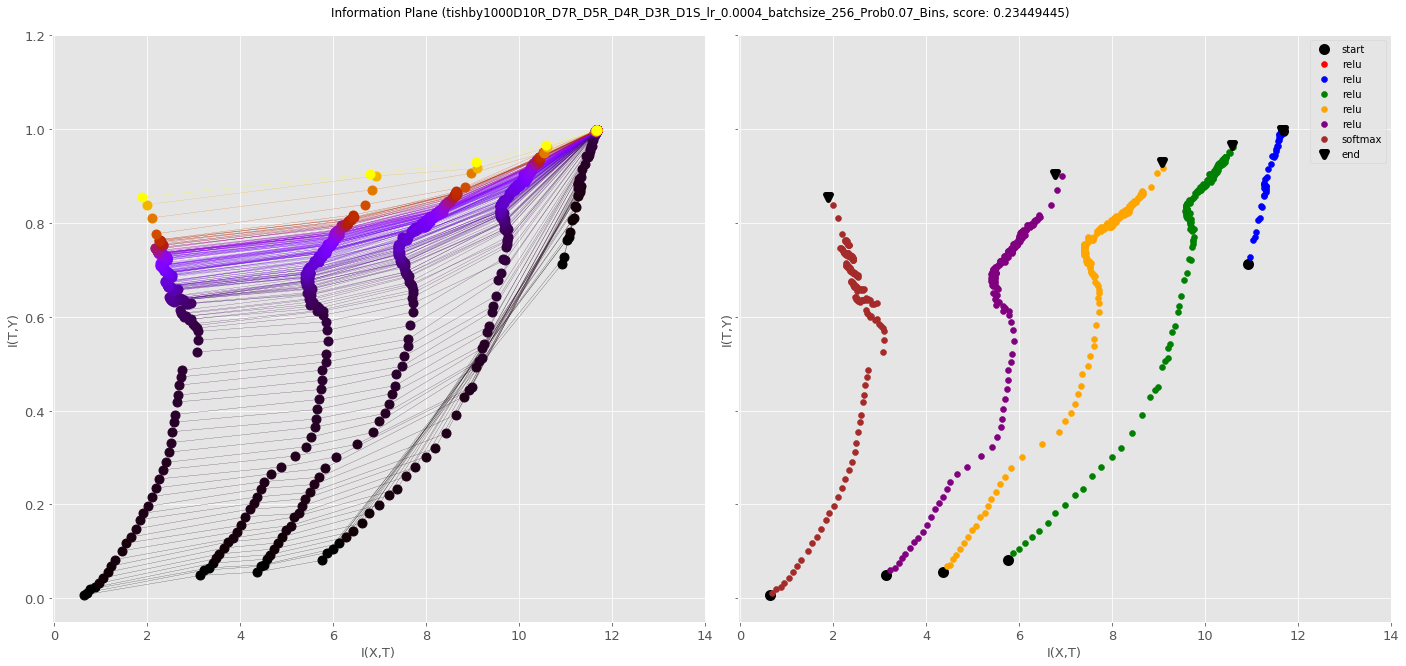

257.77505729021505

In [15]:
# binning proc
timeit.timeit(do_thisb, number = 1)

Starting Kolchinsky calculation for MI in parallel
creating info plane layer view plot


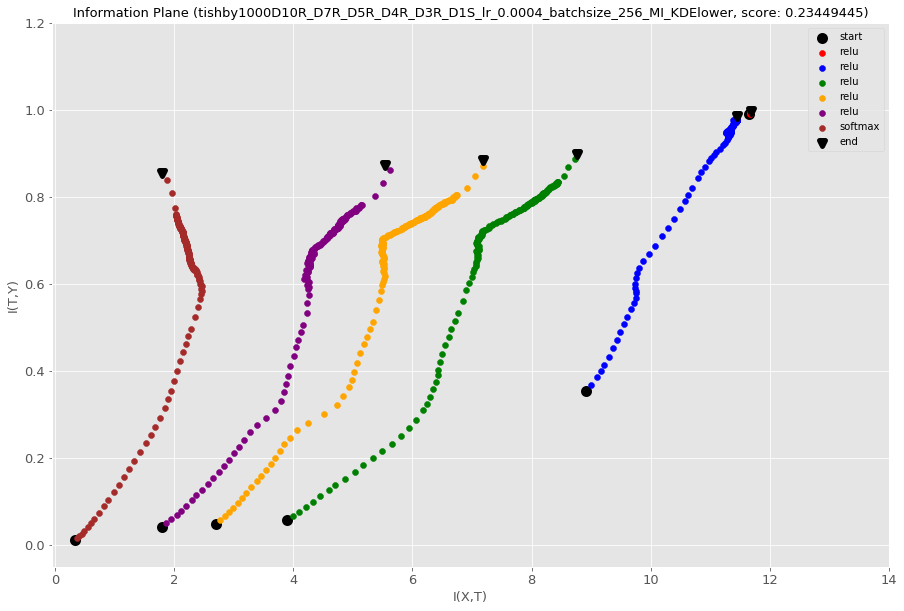

creating info plane epoch view plot


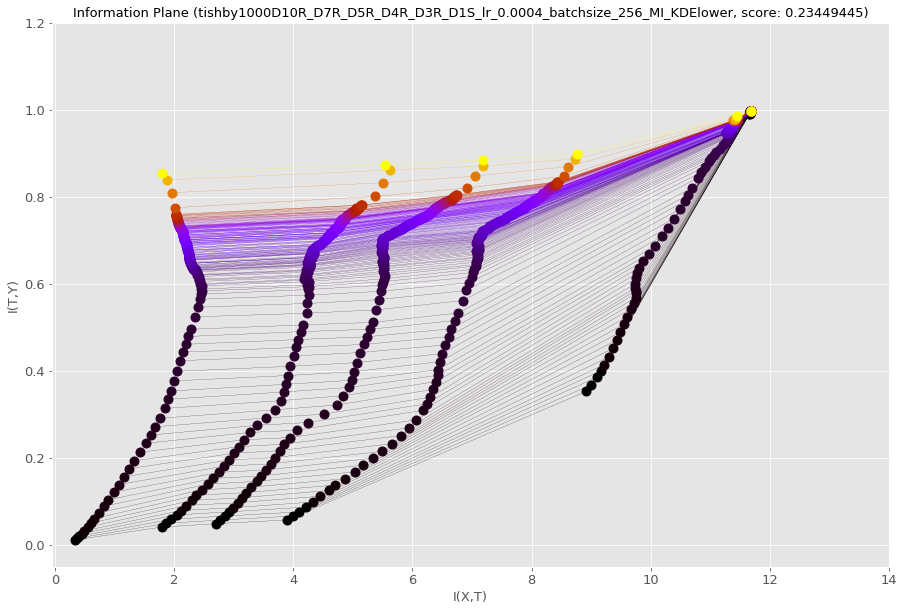

Creating combinationview plot


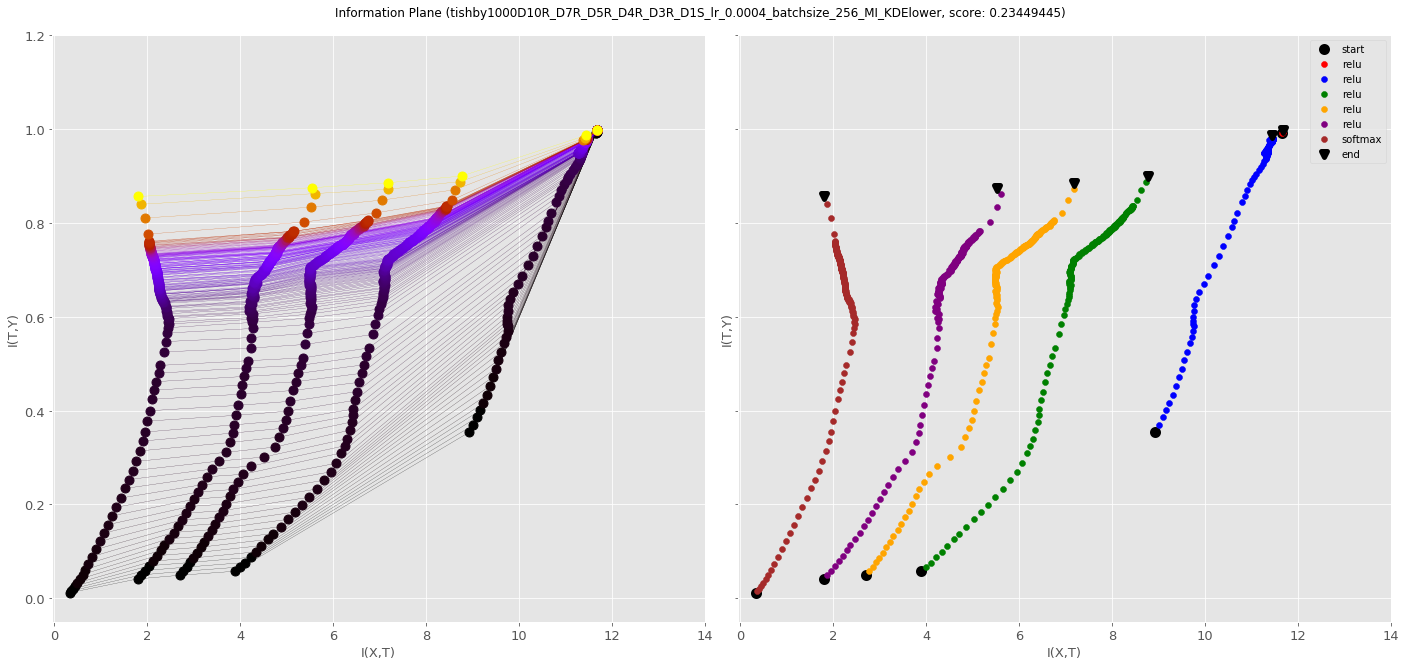

547.2283281832933

In [16]:
# KDE lower par
timeit.timeit(do_this4, number = 1)

calculated KDE MI_X and MI_Y for epoch: 0
calculated KDE MI_X and MI_Y for epoch: 1
calculated KDE MI_X and MI_Y for epoch: 2
calculated KDE MI_X and MI_Y for epoch: 3
calculated KDE MI_X and MI_Y for epoch: 4
calculated KDE MI_X and MI_Y for epoch: 5
calculated KDE MI_X and MI_Y for epoch: 6
calculated KDE MI_X and MI_Y for epoch: 7
calculated KDE MI_X and MI_Y for epoch: 8
calculated KDE MI_X and MI_Y for epoch: 9
calculated KDE MI_X and MI_Y for epoch: 10
calculated KDE MI_X and MI_Y for epoch: 11
calculated KDE MI_X and MI_Y for epoch: 12
calculated KDE MI_X and MI_Y for epoch: 13
calculated KDE MI_X and MI_Y for epoch: 14
calculated KDE MI_X and MI_Y for epoch: 15
calculated KDE MI_X and MI_Y for epoch: 16
calculated KDE MI_X and MI_Y for epoch: 17
calculated KDE MI_X and MI_Y for epoch: 18
calculated KDE MI_X and MI_Y for epoch: 19
calculated KDE MI_X and MI_Y for epoch: 20
calculated KDE MI_X and MI_Y for epoch: 21
calculated KDE MI_X and MI_Y for epoch: 22
calculated KDE MI_X a

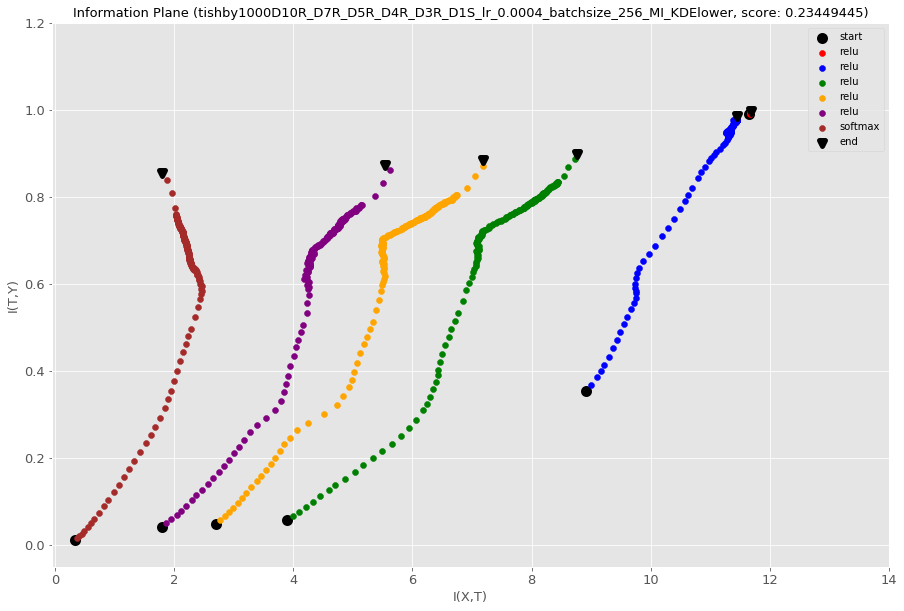

creating info plane epoch view plot


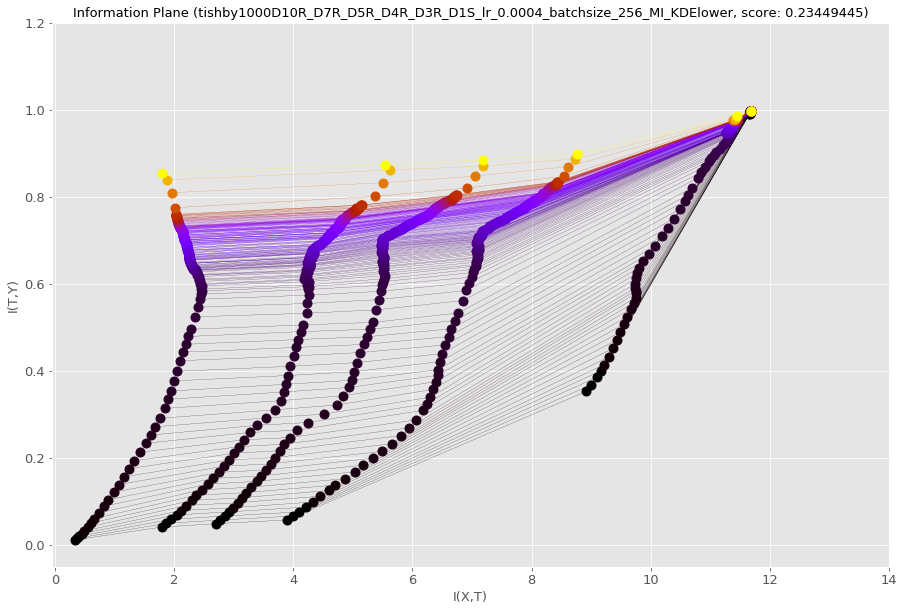

Creating combinationview plot


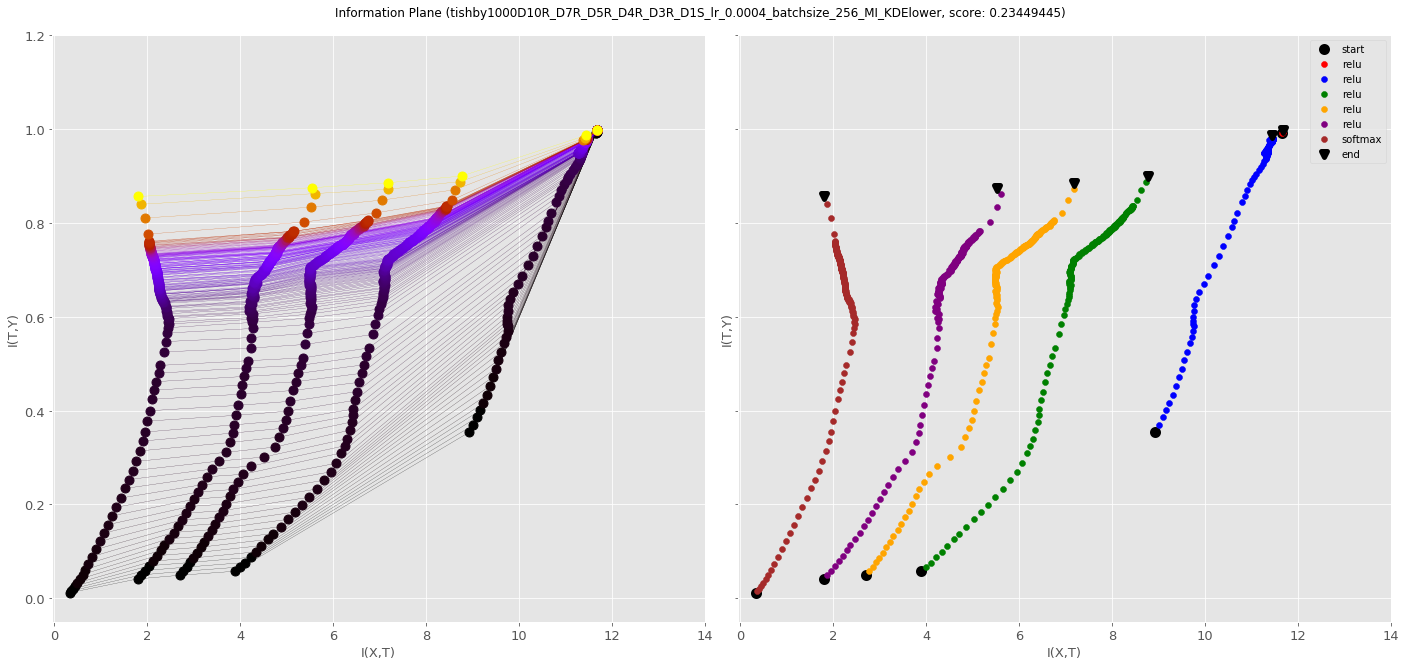

495.404327834025

In [17]:
# KDE lower proc
timeit.timeit(do_this4b, number = 1)

Starting Kraskov_dis calculation for MI in parallel
calculated Kraskov_dis MI_X in parallel
calculated Kraskov_dis MI_Y in parallel
creating info plane layer view plot


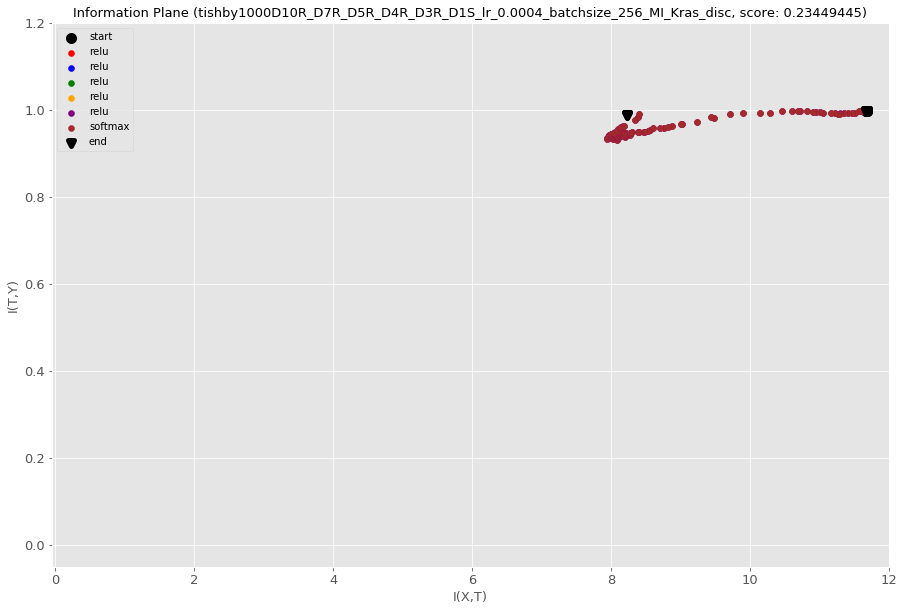

creating info plane epoch view plot


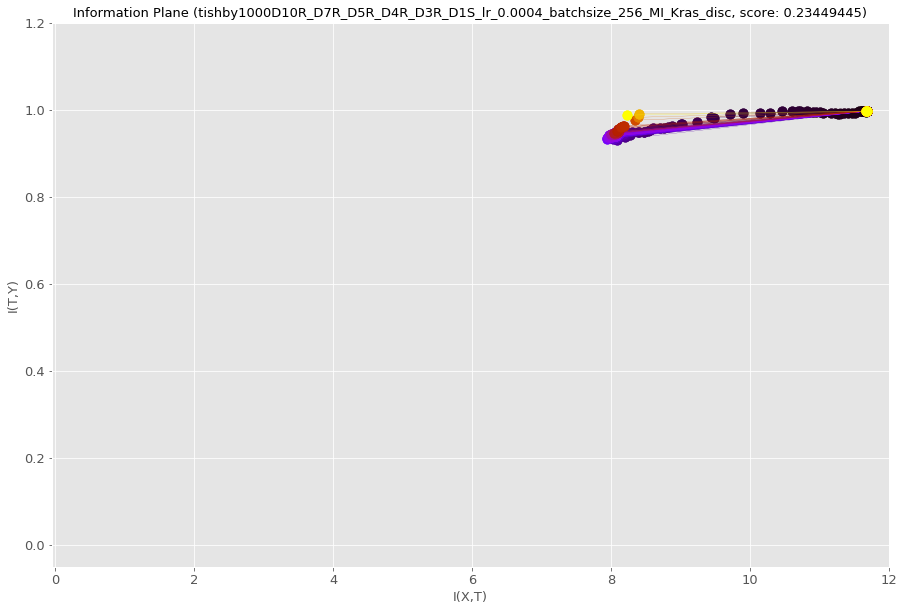

Creating combinationview plot


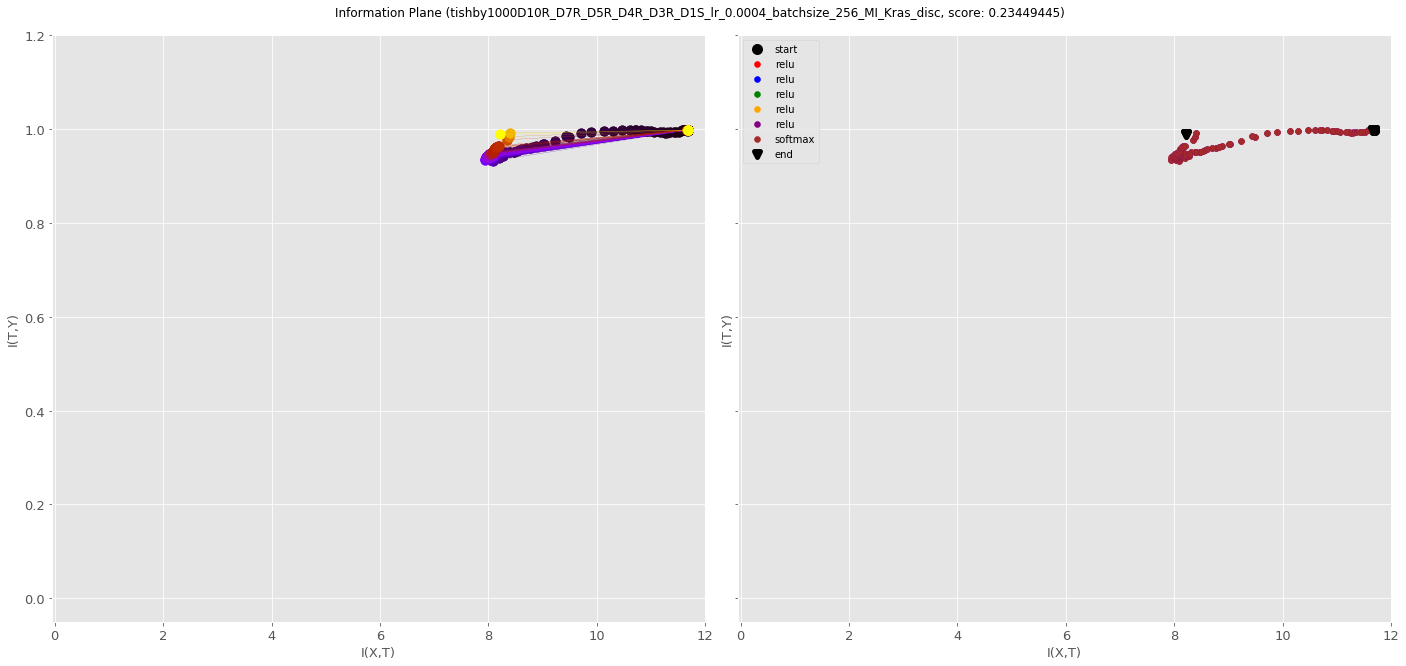

137.5889918161556

In [18]:
# Krasov dis par
timeit.timeit(do_this5, number = 1)

calculated Kraskov MI for (epoch, layer): (0, 0)
calculated Kraskov MI for (epoch, layer): (0, 1)
calculated Kraskov MI for (epoch, layer): (0, 2)
calculated Kraskov MI for (epoch, layer): (0, 3)
calculated Kraskov MI for (epoch, layer): (0, 4)
calculated Kraskov MI for (epoch, layer): (0, 5)
calculated Kraskov MI for (epoch, layer): (1, 0)
calculated Kraskov MI for (epoch, layer): (1, 1)
calculated Kraskov MI for (epoch, layer): (1, 2)
calculated Kraskov MI for (epoch, layer): (1, 3)
calculated Kraskov MI for (epoch, layer): (1, 4)
calculated Kraskov MI for (epoch, layer): (1, 5)
calculated Kraskov MI for (epoch, layer): (2, 0)
calculated Kraskov MI for (epoch, layer): (2, 1)
calculated Kraskov MI for (epoch, layer): (2, 2)
calculated Kraskov MI for (epoch, layer): (2, 3)
calculated Kraskov MI for (epoch, layer): (2, 4)
calculated Kraskov MI for (epoch, layer): (2, 5)
calculated Kraskov MI for (epoch, layer): (3, 0)
calculated Kraskov MI for (epoch, layer): (3, 1)
calculated Kraskov M

calculated Kraskov MI for (epoch, layer): (28, 1)
calculated Kraskov MI for (epoch, layer): (28, 2)
calculated Kraskov MI for (epoch, layer): (28, 3)
calculated Kraskov MI for (epoch, layer): (28, 4)
calculated Kraskov MI for (epoch, layer): (28, 5)
calculated Kraskov MI for (epoch, layer): (29, 0)
calculated Kraskov MI for (epoch, layer): (29, 1)
calculated Kraskov MI for (epoch, layer): (29, 2)
calculated Kraskov MI for (epoch, layer): (29, 3)
calculated Kraskov MI for (epoch, layer): (29, 4)
calculated Kraskov MI for (epoch, layer): (29, 5)
calculated Kraskov MI for (epoch, layer): (30, 0)
calculated Kraskov MI for (epoch, layer): (30, 1)
calculated Kraskov MI for (epoch, layer): (30, 2)
calculated Kraskov MI for (epoch, layer): (30, 3)
calculated Kraskov MI for (epoch, layer): (30, 4)
calculated Kraskov MI for (epoch, layer): (30, 5)
calculated Kraskov MI for (epoch, layer): (100, 0)
calculated Kraskov MI for (epoch, layer): (100, 1)
calculated Kraskov MI for (epoch, layer): (100, 

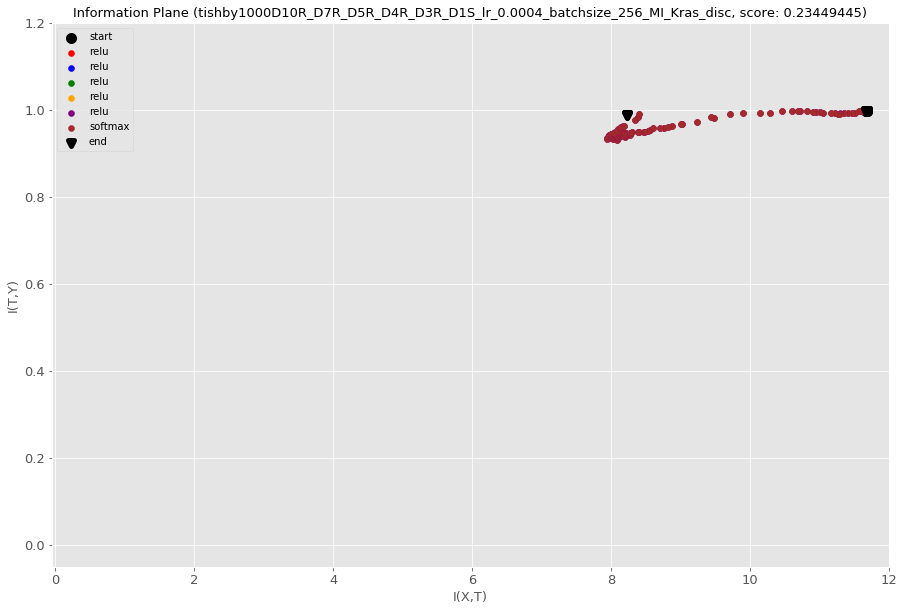

creating info plane epoch view plot


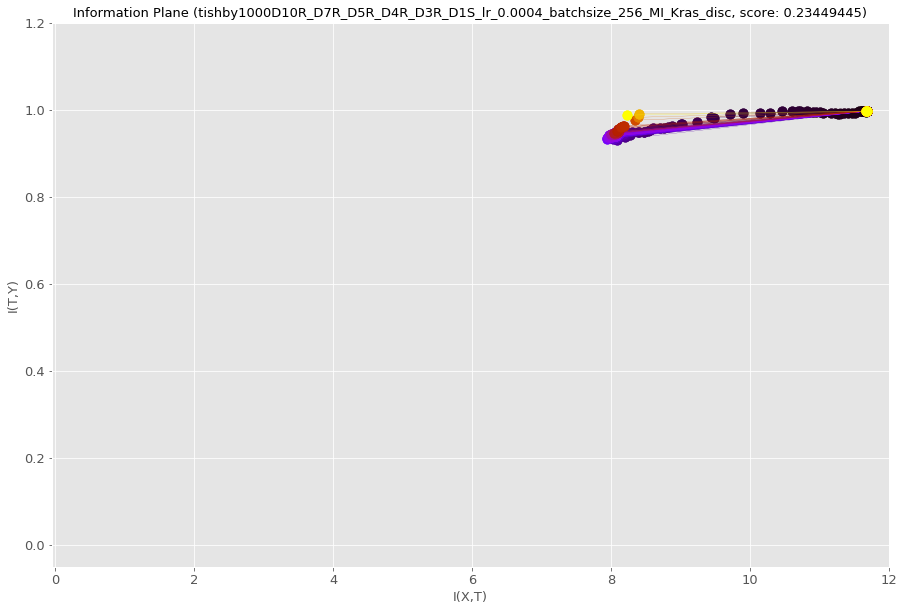

Creating combinationview plot


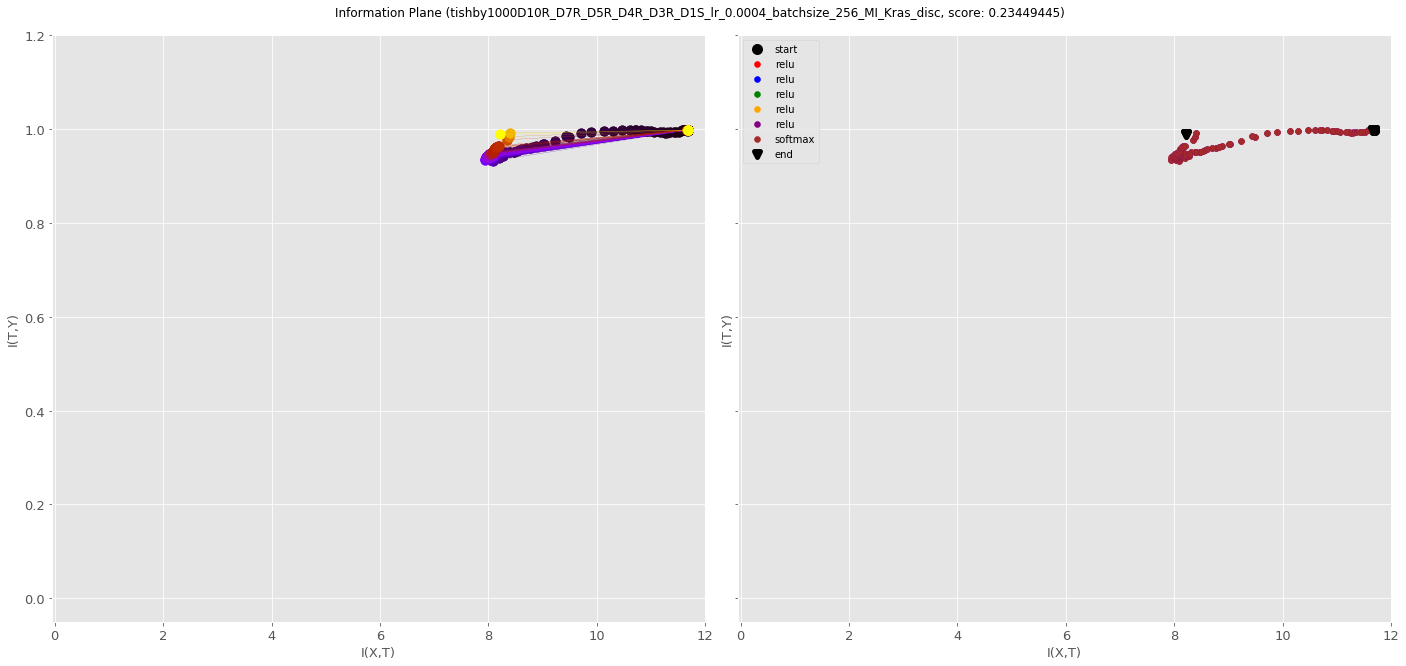

64.61963553586975

In [19]:
# Krasov  dis proc
timeit.timeit(do_this5b, number = 1)

Starting Kraskov_mix calculation for MI in parallel
calculated Kraskov_mix MI_X in parallel
calculated Kraskov_mix MI_Y in parallel
creating info plane layer view plot


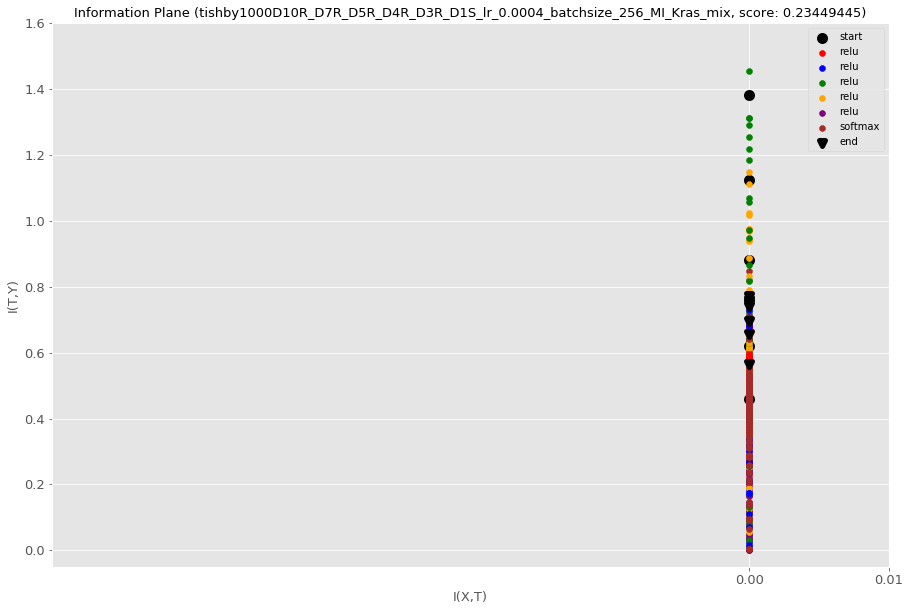

creating info plane epoch view plot


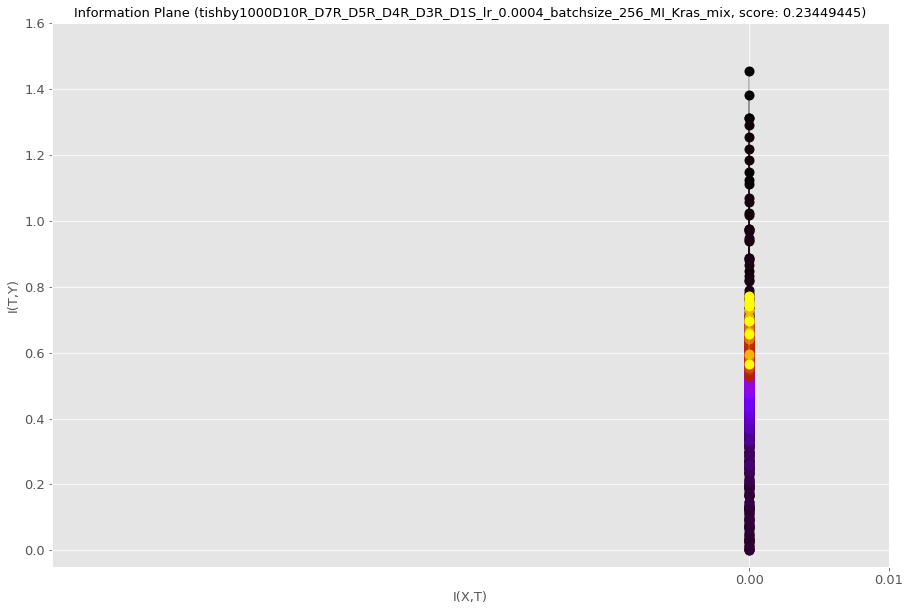

Creating combinationview plot


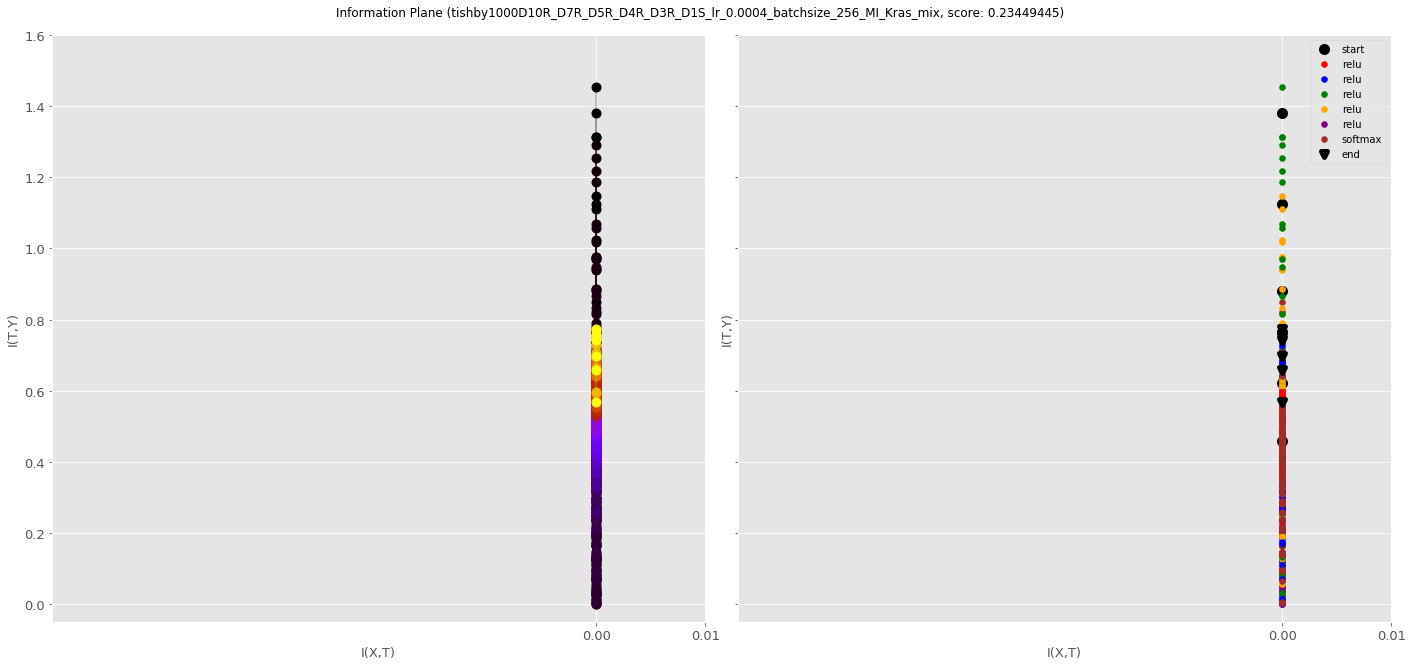

3408.40981732402

In [20]:
# Krasov mix par
timeit.timeit(do_this6, number = 1)

/cs/scratch/ms400/master-thesis/Code/npeet.py:192: UserWarning: Warning, after conditioning, on y=[0 0 0 0 0 0 0 0 0 0 0 0] insufficient data. Assuming maximal entropy in this case.
  "Assuming maximal entropy in this case.".format(yval=yval))
/cs/scratch/ms400/master-thesis/Code/npeet.py:192: UserWarning: Warning, after conditioning, on y=[0 0 0 0 0 0 0 0 0 0 0 1] insufficient data. Assuming maximal entropy in this case.
  "Assuming maximal entropy in this case.".format(yval=yval))
/cs/scratch/ms400/master-thesis/Code/npeet.py:192: UserWarning: Warning, after conditioning, on y=[0 0 0 0 0 0 0 0 0 0 1 0] insufficient data. Assuming maximal entropy in this case.
  "Assuming maximal entropy in this case.".format(yval=yval))
/cs/scratch/ms400/master-thesis/Code/npeet.py:192: UserWarning: Warning, after conditioning, on y=[0 0 0 0 0 0 0 0 0 0 1 1] insufficient data. Assuming maximal entropy in this case.
  "Assuming maximal entropy in this case.".format(yval=yval))
/cs/scratch/ms400/master

/cs/scratch/ms400/master-thesis/Code/npeet.py:192: UserWarning: Warning, after conditioning, on y=[0 0 0 0 0 1 0 1 0 1 0 1] insufficient data. Assuming maximal entropy in this case.
  "Assuming maximal entropy in this case.".format(yval=yval))
/cs/scratch/ms400/master-thesis/Code/npeet.py:192: UserWarning: Warning, after conditioning, on y=[0 0 0 0 0 1 0 1 0 1 1 0] insufficient data. Assuming maximal entropy in this case.
  "Assuming maximal entropy in this case.".format(yval=yval))
/cs/scratch/ms400/master-thesis/Code/npeet.py:192: UserWarning: Warning, after conditioning, on y=[0 0 0 0 0 1 0 1 0 1 1 1] insufficient data. Assuming maximal entropy in this case.
  "Assuming maximal entropy in this case.".format(yval=yval))
/cs/scratch/ms400/master-thesis/Code/npeet.py:192: UserWarning: Warning, after conditioning, on y=[0 0 0 0 0 1 0 1 1 0 0 0] insufficient data. Assuming maximal entropy in this case.
  "Assuming maximal entropy in this case.".format(yval=yval))
/cs/scratch/ms400/master

/cs/scratch/ms400/master-thesis/Code/npeet.py:192: UserWarning: Warning, after conditioning, on y=[0 0 0 0 1 0 0 1 1 1 1 0] insufficient data. Assuming maximal entropy in this case.
  "Assuming maximal entropy in this case.".format(yval=yval))
/cs/scratch/ms400/master-thesis/Code/npeet.py:192: UserWarning: Warning, after conditioning, on y=[0 0 0 0 1 0 0 1 1 1 1 1] insufficient data. Assuming maximal entropy in this case.
  "Assuming maximal entropy in this case.".format(yval=yval))
/cs/scratch/ms400/master-thesis/Code/npeet.py:192: UserWarning: Warning, after conditioning, on y=[0 0 0 0 1 0 1 0 0 0 0 0] insufficient data. Assuming maximal entropy in this case.
  "Assuming maximal entropy in this case.".format(yval=yval))
/cs/scratch/ms400/master-thesis/Code/npeet.py:192: UserWarning: Warning, after conditioning, on y=[0 0 0 0 1 0 1 0 0 0 0 1] insufficient data. Assuming maximal entropy in this case.
  "Assuming maximal entropy in this case.".format(yval=yval))
/cs/scratch/ms400/master

/cs/scratch/ms400/master-thesis/Code/npeet.py:192: UserWarning: Warning, after conditioning, on y=[0 0 0 0 1 1 1 0 1 1 0 1] insufficient data. Assuming maximal entropy in this case.
  "Assuming maximal entropy in this case.".format(yval=yval))
/cs/scratch/ms400/master-thesis/Code/npeet.py:192: UserWarning: Warning, after conditioning, on y=[0 0 0 0 1 1 1 1 0 0 0 1] insufficient data. Assuming maximal entropy in this case.
  "Assuming maximal entropy in this case.".format(yval=yval))
/cs/scratch/ms400/master-thesis/Code/npeet.py:192: UserWarning: Warning, after conditioning, on y=[0 0 0 0 1 1 1 1 0 0 1 0] insufficient data. Assuming maximal entropy in this case.
  "Assuming maximal entropy in this case.".format(yval=yval))
/cs/scratch/ms400/master-thesis/Code/npeet.py:192: UserWarning: Warning, after conditioning, on y=[0 0 0 0 1 1 1 1 0 0 1 1] insufficient data. Assuming maximal entropy in this case.
  "Assuming maximal entropy in this case.".format(yval=yval))
/cs/scratch/ms400/master

/cs/scratch/ms400/master-thesis/Code/npeet.py:192: UserWarning: Warning, after conditioning, on y=[0 0 0 1 0 0 1 1 1 1 0 0] insufficient data. Assuming maximal entropy in this case.
  "Assuming maximal entropy in this case.".format(yval=yval))
/cs/scratch/ms400/master-thesis/Code/npeet.py:192: UserWarning: Warning, after conditioning, on y=[0 0 0 1 0 0 1 1 1 1 0 1] insufficient data. Assuming maximal entropy in this case.
  "Assuming maximal entropy in this case.".format(yval=yval))
/cs/scratch/ms400/master-thesis/Code/npeet.py:192: UserWarning: Warning, after conditioning, on y=[0 0 0 1 0 0 1 1 1 1 1 1] insufficient data. Assuming maximal entropy in this case.
  "Assuming maximal entropy in this case.".format(yval=yval))
/cs/scratch/ms400/master-thesis/Code/npeet.py:192: UserWarning: Warning, after conditioning, on y=[0 0 0 1 0 1 0 0 0 0 0 0] insufficient data. Assuming maximal entropy in this case.
  "Assuming maximal entropy in this case.".format(yval=yval))
/cs/scratch/ms400/master

/cs/scratch/ms400/master-thesis/Code/npeet.py:192: UserWarning: Warning, after conditioning, on y=[0 0 0 1 1 0 0 0 0 0 1 0] insufficient data. Assuming maximal entropy in this case.
  "Assuming maximal entropy in this case.".format(yval=yval))
/cs/scratch/ms400/master-thesis/Code/npeet.py:192: UserWarning: Warning, after conditioning, on y=[0 0 0 1 1 0 0 0 0 1 0 0] insufficient data. Assuming maximal entropy in this case.
  "Assuming maximal entropy in this case.".format(yval=yval))
/cs/scratch/ms400/master-thesis/Code/npeet.py:192: UserWarning: Warning, after conditioning, on y=[0 0 0 1 1 0 0 0 0 1 0 1] insufficient data. Assuming maximal entropy in this case.
  "Assuming maximal entropy in this case.".format(yval=yval))
/cs/scratch/ms400/master-thesis/Code/npeet.py:192: UserWarning: Warning, after conditioning, on y=[0 0 0 1 1 0 0 0 0 1 1 0] insufficient data. Assuming maximal entropy in this case.
  "Assuming maximal entropy in this case.".format(yval=yval))
/cs/scratch/ms400/master

/cs/scratch/ms400/master-thesis/Code/npeet.py:192: UserWarning: Warning, after conditioning, on y=[0 0 0 1 1 1 0 0 1 1 1 0] insufficient data. Assuming maximal entropy in this case.
  "Assuming maximal entropy in this case.".format(yval=yval))
/cs/scratch/ms400/master-thesis/Code/npeet.py:192: UserWarning: Warning, after conditioning, on y=[0 0 0 1 1 1 0 1 0 0 0 0] insufficient data. Assuming maximal entropy in this case.
  "Assuming maximal entropy in this case.".format(yval=yval))
/cs/scratch/ms400/master-thesis/Code/npeet.py:192: UserWarning: Warning, after conditioning, on y=[0 0 0 1 1 1 0 1 0 0 1 0] insufficient data. Assuming maximal entropy in this case.
  "Assuming maximal entropy in this case.".format(yval=yval))
/cs/scratch/ms400/master-thesis/Code/npeet.py:192: UserWarning: Warning, after conditioning, on y=[0 0 0 1 1 1 0 1 0 0 1 1] insufficient data. Assuming maximal entropy in this case.
  "Assuming maximal entropy in this case.".format(yval=yval))
/cs/scratch/ms400/master

/cs/scratch/ms400/master-thesis/Code/npeet.py:192: UserWarning: Warning, after conditioning, on y=[0 0 1 0 0 0 0 1 1 0 0 0] insufficient data. Assuming maximal entropy in this case.
  "Assuming maximal entropy in this case.".format(yval=yval))
/cs/scratch/ms400/master-thesis/Code/npeet.py:192: UserWarning: Warning, after conditioning, on y=[0 0 1 0 0 0 0 1 1 0 0 1] insufficient data. Assuming maximal entropy in this case.
  "Assuming maximal entropy in this case.".format(yval=yval))
/cs/scratch/ms400/master-thesis/Code/npeet.py:192: UserWarning: Warning, after conditioning, on y=[0 0 1 0 0 0 0 1 1 0 1 1] insufficient data. Assuming maximal entropy in this case.
  "Assuming maximal entropy in this case.".format(yval=yval))
/cs/scratch/ms400/master-thesis/Code/npeet.py:192: UserWarning: Warning, after conditioning, on y=[0 0 1 0 0 0 0 1 1 1 0 0] insufficient data. Assuming maximal entropy in this case.
  "Assuming maximal entropy in this case.".format(yval=yval))
/cs/scratch/ms400/master

/cs/scratch/ms400/master-thesis/Code/npeet.py:192: UserWarning: Warning, after conditioning, on y=[0 0 1 0 0 1 1 0 0 0 0 1] insufficient data. Assuming maximal entropy in this case.
  "Assuming maximal entropy in this case.".format(yval=yval))
/cs/scratch/ms400/master-thesis/Code/npeet.py:192: UserWarning: Warning, after conditioning, on y=[0 0 1 0 0 1 1 0 0 0 1 0] insufficient data. Assuming maximal entropy in this case.
  "Assuming maximal entropy in this case.".format(yval=yval))
/cs/scratch/ms400/master-thesis/Code/npeet.py:192: UserWarning: Warning, after conditioning, on y=[0 0 1 0 0 1 1 0 0 0 1 1] insufficient data. Assuming maximal entropy in this case.
  "Assuming maximal entropy in this case.".format(yval=yval))
/cs/scratch/ms400/master-thesis/Code/npeet.py:192: UserWarning: Warning, after conditioning, on y=[0 0 1 0 0 1 1 0 0 1 0 0] insufficient data. Assuming maximal entropy in this case.
  "Assuming maximal entropy in this case.".format(yval=yval))
/cs/scratch/ms400/master

/cs/scratch/ms400/master-thesis/Code/npeet.py:192: UserWarning: Warning, after conditioning, on y=[0 0 1 0 1 0 0 1 1 1 0 1] insufficient data. Assuming maximal entropy in this case.
  "Assuming maximal entropy in this case.".format(yval=yval))
/cs/scratch/ms400/master-thesis/Code/npeet.py:192: UserWarning: Warning, after conditioning, on y=[0 0 1 0 1 0 0 1 1 1 1 1] insufficient data. Assuming maximal entropy in this case.
  "Assuming maximal entropy in this case.".format(yval=yval))
/cs/scratch/ms400/master-thesis/Code/npeet.py:192: UserWarning: Warning, after conditioning, on y=[0 0 1 0 1 0 1 0 0 0 0 0] insufficient data. Assuming maximal entropy in this case.
  "Assuming maximal entropy in this case.".format(yval=yval))
/cs/scratch/ms400/master-thesis/Code/npeet.py:192: UserWarning: Warning, after conditioning, on y=[0 0 1 0 1 0 1 0 0 0 0 1] insufficient data. Assuming maximal entropy in this case.
  "Assuming maximal entropy in this case.".format(yval=yval))
/cs/scratch/ms400/master

/cs/scratch/ms400/master-thesis/Code/npeet.py:192: UserWarning: Warning, after conditioning, on y=[0 0 1 0 1 1 1 0 0 1 0 1] insufficient data. Assuming maximal entropy in this case.
  "Assuming maximal entropy in this case.".format(yval=yval))
/cs/scratch/ms400/master-thesis/Code/npeet.py:192: UserWarning: Warning, after conditioning, on y=[0 0 1 0 1 1 1 0 0 1 1 0] insufficient data. Assuming maximal entropy in this case.
  "Assuming maximal entropy in this case.".format(yval=yval))
/cs/scratch/ms400/master-thesis/Code/npeet.py:192: UserWarning: Warning, after conditioning, on y=[0 0 1 0 1 1 1 0 0 1 1 1] insufficient data. Assuming maximal entropy in this case.
  "Assuming maximal entropy in this case.".format(yval=yval))
/cs/scratch/ms400/master-thesis/Code/npeet.py:192: UserWarning: Warning, after conditioning, on y=[0 0 1 0 1 1 1 0 1 0 0 1] insufficient data. Assuming maximal entropy in this case.
  "Assuming maximal entropy in this case.".format(yval=yval))
/cs/scratch/ms400/master

/cs/scratch/ms400/master-thesis/Code/npeet.py:192: UserWarning: Warning, after conditioning, on y=[0 0 1 1 0 0 1 1 0 1 1 0] insufficient data. Assuming maximal entropy in this case.
  "Assuming maximal entropy in this case.".format(yval=yval))
/cs/scratch/ms400/master-thesis/Code/npeet.py:192: UserWarning: Warning, after conditioning, on y=[0 0 1 1 0 0 1 1 0 1 1 1] insufficient data. Assuming maximal entropy in this case.
  "Assuming maximal entropy in this case.".format(yval=yval))
/cs/scratch/ms400/master-thesis/Code/npeet.py:192: UserWarning: Warning, after conditioning, on y=[0 0 1 1 0 0 1 1 1 0 0 0] insufficient data. Assuming maximal entropy in this case.
  "Assuming maximal entropy in this case.".format(yval=yval))
/cs/scratch/ms400/master-thesis/Code/npeet.py:192: UserWarning: Warning, after conditioning, on y=[0 0 1 1 0 0 1 1 1 0 0 1] insufficient data. Assuming maximal entropy in this case.
  "Assuming maximal entropy in this case.".format(yval=yval))
/cs/scratch/ms400/master

/cs/scratch/ms400/master-thesis/Code/npeet.py:192: UserWarning: Warning, after conditioning, on y=[0 0 1 1 1 0 0 0 0 0 0 0] insufficient data. Assuming maximal entropy in this case.
  "Assuming maximal entropy in this case.".format(yval=yval))
/cs/scratch/ms400/master-thesis/Code/npeet.py:192: UserWarning: Warning, after conditioning, on y=[0 0 1 1 1 0 0 0 0 0 0 1] insufficient data. Assuming maximal entropy in this case.
  "Assuming maximal entropy in this case.".format(yval=yval))
/cs/scratch/ms400/master-thesis/Code/npeet.py:192: UserWarning: Warning, after conditioning, on y=[0 0 1 1 1 0 0 0 0 0 1 0] insufficient data. Assuming maximal entropy in this case.
  "Assuming maximal entropy in this case.".format(yval=yval))
/cs/scratch/ms400/master-thesis/Code/npeet.py:192: UserWarning: Warning, after conditioning, on y=[0 0 1 1 1 0 0 0 0 0 1 1] insufficient data. Assuming maximal entropy in this case.
  "Assuming maximal entropy in this case.".format(yval=yval))
/cs/scratch/ms400/master

/cs/scratch/ms400/master-thesis/Code/npeet.py:192: UserWarning: Warning, after conditioning, on y=[0 0 1 1 1 1 0 0 0 0 1 0] insufficient data. Assuming maximal entropy in this case.
  "Assuming maximal entropy in this case.".format(yval=yval))
/cs/scratch/ms400/master-thesis/Code/npeet.py:192: UserWarning: Warning, after conditioning, on y=[0 0 1 1 1 1 0 0 0 0 1 1] insufficient data. Assuming maximal entropy in this case.
  "Assuming maximal entropy in this case.".format(yval=yval))
/cs/scratch/ms400/master-thesis/Code/npeet.py:192: UserWarning: Warning, after conditioning, on y=[0 0 1 1 1 1 0 0 0 1 0 1] insufficient data. Assuming maximal entropy in this case.
  "Assuming maximal entropy in this case.".format(yval=yval))
/cs/scratch/ms400/master-thesis/Code/npeet.py:192: UserWarning: Warning, after conditioning, on y=[0 0 1 1 1 1 0 0 0 1 1 0] insufficient data. Assuming maximal entropy in this case.
  "Assuming maximal entropy in this case.".format(yval=yval))
/cs/scratch/ms400/master

/cs/scratch/ms400/master-thesis/Code/npeet.py:192: UserWarning: Warning, after conditioning, on y=[0 1 0 0 0 0 0 0 0 1 1 1] insufficient data. Assuming maximal entropy in this case.
  "Assuming maximal entropy in this case.".format(yval=yval))
/cs/scratch/ms400/master-thesis/Code/npeet.py:192: UserWarning: Warning, after conditioning, on y=[0 1 0 0 0 0 0 0 1 0 0 1] insufficient data. Assuming maximal entropy in this case.
  "Assuming maximal entropy in this case.".format(yval=yval))
/cs/scratch/ms400/master-thesis/Code/npeet.py:192: UserWarning: Warning, after conditioning, on y=[0 1 0 0 0 0 0 0 1 0 1 1] insufficient data. Assuming maximal entropy in this case.
  "Assuming maximal entropy in this case.".format(yval=yval))
/cs/scratch/ms400/master-thesis/Code/npeet.py:192: UserWarning: Warning, after conditioning, on y=[0 1 0 0 0 0 0 0 1 1 0 0] insufficient data. Assuming maximal entropy in this case.
  "Assuming maximal entropy in this case.".format(yval=yval))
/cs/scratch/ms400/master

/cs/scratch/ms400/master-thesis/Code/npeet.py:192: UserWarning: Warning, after conditioning, on y=[0 1 0 0 0 1 0 1 0 1 1 1] insufficient data. Assuming maximal entropy in this case.
  "Assuming maximal entropy in this case.".format(yval=yval))
/cs/scratch/ms400/master-thesis/Code/npeet.py:192: UserWarning: Warning, after conditioning, on y=[0 1 0 0 0 1 0 1 1 0 0 0] insufficient data. Assuming maximal entropy in this case.
  "Assuming maximal entropy in this case.".format(yval=yval))
/cs/scratch/ms400/master-thesis/Code/npeet.py:192: UserWarning: Warning, after conditioning, on y=[0 1 0 0 0 1 0 1 1 0 0 1] insufficient data. Assuming maximal entropy in this case.
  "Assuming maximal entropy in this case.".format(yval=yval))
/cs/scratch/ms400/master-thesis/Code/npeet.py:192: UserWarning: Warning, after conditioning, on y=[0 1 0 0 0 1 0 1 1 0 1 1] insufficient data. Assuming maximal entropy in this case.
  "Assuming maximal entropy in this case.".format(yval=yval))
/cs/scratch/ms400/master

/cs/scratch/ms400/master-thesis/Code/npeet.py:192: UserWarning: Warning, after conditioning, on y=[0 1 0 0 1 0 1 0 0 1 0 1] insufficient data. Assuming maximal entropy in this case.
  "Assuming maximal entropy in this case.".format(yval=yval))
/cs/scratch/ms400/master-thesis/Code/npeet.py:192: UserWarning: Warning, after conditioning, on y=[0 1 0 0 1 0 1 0 0 1 1 0] insufficient data. Assuming maximal entropy in this case.
  "Assuming maximal entropy in this case.".format(yval=yval))
/cs/scratch/ms400/master-thesis/Code/npeet.py:192: UserWarning: Warning, after conditioning, on y=[0 1 0 0 1 0 1 0 0 1 1 1] insufficient data. Assuming maximal entropy in this case.
  "Assuming maximal entropy in this case.".format(yval=yval))
/cs/scratch/ms400/master-thesis/Code/npeet.py:192: UserWarning: Warning, after conditioning, on y=[0 1 0 0 1 0 1 0 1 0 0 1] insufficient data. Assuming maximal entropy in this case.
  "Assuming maximal entropy in this case.".format(yval=yval))
/cs/scratch/ms400/master

/cs/scratch/ms400/master-thesis/Code/npeet.py:192: UserWarning: Warning, after conditioning, on y=[0 1 0 0 1 1 1 0 1 0 1 1] insufficient data. Assuming maximal entropy in this case.
  "Assuming maximal entropy in this case.".format(yval=yval))
/cs/scratch/ms400/master-thesis/Code/npeet.py:192: UserWarning: Warning, after conditioning, on y=[0 1 0 0 1 1 1 0 1 1 0 1] insufficient data. Assuming maximal entropy in this case.
  "Assuming maximal entropy in this case.".format(yval=yval))
/cs/scratch/ms400/master-thesis/Code/npeet.py:192: UserWarning: Warning, after conditioning, on y=[0 1 0 0 1 1 1 0 1 1 1 0] insufficient data. Assuming maximal entropy in this case.
  "Assuming maximal entropy in this case.".format(yval=yval))
/cs/scratch/ms400/master-thesis/Code/npeet.py:192: UserWarning: Warning, after conditioning, on y=[0 1 0 0 1 1 1 1 0 0 0 0] insufficient data. Assuming maximal entropy in this case.
  "Assuming maximal entropy in this case.".format(yval=yval))
/cs/scratch/ms400/master

/cs/scratch/ms400/master-thesis/Code/npeet.py:192: UserWarning: Warning, after conditioning, on y=[0 1 0 1 0 0 1 1 0 0 0 1] insufficient data. Assuming maximal entropy in this case.
  "Assuming maximal entropy in this case.".format(yval=yval))
/cs/scratch/ms400/master-thesis/Code/npeet.py:192: UserWarning: Warning, after conditioning, on y=[0 1 0 1 0 0 1 1 0 0 1 1] insufficient data. Assuming maximal entropy in this case.
  "Assuming maximal entropy in this case.".format(yval=yval))
/cs/scratch/ms400/master-thesis/Code/npeet.py:192: UserWarning: Warning, after conditioning, on y=[0 1 0 1 0 0 1 1 0 1 0 0] insufficient data. Assuming maximal entropy in this case.
  "Assuming maximal entropy in this case.".format(yval=yval))
/cs/scratch/ms400/master-thesis/Code/npeet.py:192: UserWarning: Warning, after conditioning, on y=[0 1 0 1 0 0 1 1 0 1 0 1] insufficient data. Assuming maximal entropy in this case.
  "Assuming maximal entropy in this case.".format(yval=yval))
/cs/scratch/ms400/master

/cs/scratch/ms400/master-thesis/Code/npeet.py:192: UserWarning: Warning, after conditioning, on y=[0 1 0 1 0 1 1 1 1 0 1 1] insufficient data. Assuming maximal entropy in this case.
  "Assuming maximal entropy in this case.".format(yval=yval))
/cs/scratch/ms400/master-thesis/Code/npeet.py:192: UserWarning: Warning, after conditioning, on y=[0 1 0 1 0 1 1 1 1 1 0 0] insufficient data. Assuming maximal entropy in this case.
  "Assuming maximal entropy in this case.".format(yval=yval))
/cs/scratch/ms400/master-thesis/Code/npeet.py:192: UserWarning: Warning, after conditioning, on y=[0 1 0 1 0 1 1 1 1 1 1 0] insufficient data. Assuming maximal entropy in this case.
  "Assuming maximal entropy in this case.".format(yval=yval))
/cs/scratch/ms400/master-thesis/Code/npeet.py:192: UserWarning: Warning, after conditioning, on y=[0 1 0 1 1 0 0 0 0 0 0 0] insufficient data. Assuming maximal entropy in this case.
  "Assuming maximal entropy in this case.".format(yval=yval))
/cs/scratch/ms400/master

/cs/scratch/ms400/master-thesis/Code/npeet.py:192: UserWarning: Warning, after conditioning, on y=[0 1 0 1 1 1 0 0 0 1 1 1] insufficient data. Assuming maximal entropy in this case.
  "Assuming maximal entropy in this case.".format(yval=yval))
/cs/scratch/ms400/master-thesis/Code/npeet.py:192: UserWarning: Warning, after conditioning, on y=[0 1 0 1 1 1 0 0 1 0 0 1] insufficient data. Assuming maximal entropy in this case.
  "Assuming maximal entropy in this case.".format(yval=yval))
/cs/scratch/ms400/master-thesis/Code/npeet.py:192: UserWarning: Warning, after conditioning, on y=[0 1 0 1 1 1 0 0 1 0 1 0] insufficient data. Assuming maximal entropy in this case.
  "Assuming maximal entropy in this case.".format(yval=yval))
/cs/scratch/ms400/master-thesis/Code/npeet.py:192: UserWarning: Warning, after conditioning, on y=[0 1 0 1 1 1 0 0 1 1 0 0] insufficient data. Assuming maximal entropy in this case.
  "Assuming maximal entropy in this case.".format(yval=yval))
/cs/scratch/ms400/master

/cs/scratch/ms400/master-thesis/Code/npeet.py:192: UserWarning: Warning, after conditioning, on y=[0 1 1 0 0 0 0 1 0 0 1 0] insufficient data. Assuming maximal entropy in this case.
  "Assuming maximal entropy in this case.".format(yval=yval))
/cs/scratch/ms400/master-thesis/Code/npeet.py:192: UserWarning: Warning, after conditioning, on y=[0 1 1 0 0 0 0 1 0 0 1 1] insufficient data. Assuming maximal entropy in this case.
  "Assuming maximal entropy in this case.".format(yval=yval))
/cs/scratch/ms400/master-thesis/Code/npeet.py:192: UserWarning: Warning, after conditioning, on y=[0 1 1 0 0 0 0 1 0 1 0 1] insufficient data. Assuming maximal entropy in this case.
  "Assuming maximal entropy in this case.".format(yval=yval))
/cs/scratch/ms400/master-thesis/Code/npeet.py:192: UserWarning: Warning, after conditioning, on y=[0 1 1 0 0 0 0 1 0 1 1 0] insufficient data. Assuming maximal entropy in this case.
  "Assuming maximal entropy in this case.".format(yval=yval))
/cs/scratch/ms400/master

/cs/scratch/ms400/master-thesis/Code/npeet.py:192: UserWarning: Warning, after conditioning, on y=[0 1 1 0 0 1 1 0 0 0 0 1] insufficient data. Assuming maximal entropy in this case.
  "Assuming maximal entropy in this case.".format(yval=yval))
/cs/scratch/ms400/master-thesis/Code/npeet.py:192: UserWarning: Warning, after conditioning, on y=[0 1 1 0 0 1 1 0 0 0 1 0] insufficient data. Assuming maximal entropy in this case.
  "Assuming maximal entropy in this case.".format(yval=yval))
/cs/scratch/ms400/master-thesis/Code/npeet.py:192: UserWarning: Warning, after conditioning, on y=[0 1 1 0 0 1 1 0 0 0 1 1] insufficient data. Assuming maximal entropy in this case.
  "Assuming maximal entropy in this case.".format(yval=yval))
/cs/scratch/ms400/master-thesis/Code/npeet.py:192: UserWarning: Warning, after conditioning, on y=[0 1 1 0 0 1 1 0 0 1 0 0] insufficient data. Assuming maximal entropy in this case.
  "Assuming maximal entropy in this case.".format(yval=yval))
/cs/scratch/ms400/master

/cs/scratch/ms400/master-thesis/Code/npeet.py:192: UserWarning: Warning, after conditioning, on y=[0 1 1 0 1 0 1 0 0 0 1 1] insufficient data. Assuming maximal entropy in this case.
  "Assuming maximal entropy in this case.".format(yval=yval))
/cs/scratch/ms400/master-thesis/Code/npeet.py:192: UserWarning: Warning, after conditioning, on y=[0 1 1 0 1 0 1 0 0 1 0 0] insufficient data. Assuming maximal entropy in this case.
  "Assuming maximal entropy in this case.".format(yval=yval))
/cs/scratch/ms400/master-thesis/Code/npeet.py:192: UserWarning: Warning, after conditioning, on y=[0 1 1 0 1 0 1 0 0 1 0 1] insufficient data. Assuming maximal entropy in this case.
  "Assuming maximal entropy in this case.".format(yval=yval))
/cs/scratch/ms400/master-thesis/Code/npeet.py:192: UserWarning: Warning, after conditioning, on y=[0 1 1 0 1 0 1 0 0 1 1 1] insufficient data. Assuming maximal entropy in this case.
  "Assuming maximal entropy in this case.".format(yval=yval))
/cs/scratch/ms400/master

/cs/scratch/ms400/master-thesis/Code/npeet.py:192: UserWarning: Warning, after conditioning, on y=[0 1 1 0 1 1 1 0 1 1 0 0] insufficient data. Assuming maximal entropy in this case.
  "Assuming maximal entropy in this case.".format(yval=yval))
/cs/scratch/ms400/master-thesis/Code/npeet.py:192: UserWarning: Warning, after conditioning, on y=[0 1 1 0 1 1 1 0 1 1 0 1] insufficient data. Assuming maximal entropy in this case.
  "Assuming maximal entropy in this case.".format(yval=yval))
/cs/scratch/ms400/master-thesis/Code/npeet.py:192: UserWarning: Warning, after conditioning, on y=[0 1 1 0 1 1 1 0 1 1 1 0] insufficient data. Assuming maximal entropy in this case.
  "Assuming maximal entropy in this case.".format(yval=yval))
/cs/scratch/ms400/master-thesis/Code/npeet.py:192: UserWarning: Warning, after conditioning, on y=[0 1 1 0 1 1 1 0 1 1 1 1] insufficient data. Assuming maximal entropy in this case.
  "Assuming maximal entropy in this case.".format(yval=yval))
/cs/scratch/ms400/master

/cs/scratch/ms400/master-thesis/Code/npeet.py:192: UserWarning: Warning, after conditioning, on y=[0 1 1 1 0 0 1 1 0 1 0 1] insufficient data. Assuming maximal entropy in this case.
  "Assuming maximal entropy in this case.".format(yval=yval))
/cs/scratch/ms400/master-thesis/Code/npeet.py:192: UserWarning: Warning, after conditioning, on y=[0 1 1 1 0 0 1 1 0 1 1 1] insufficient data. Assuming maximal entropy in this case.
  "Assuming maximal entropy in this case.".format(yval=yval))
/cs/scratch/ms400/master-thesis/Code/npeet.py:192: UserWarning: Warning, after conditioning, on y=[0 1 1 1 0 0 1 1 1 0 0 0] insufficient data. Assuming maximal entropy in this case.
  "Assuming maximal entropy in this case.".format(yval=yval))
/cs/scratch/ms400/master-thesis/Code/npeet.py:192: UserWarning: Warning, after conditioning, on y=[0 1 1 1 0 0 1 1 1 0 0 1] insufficient data. Assuming maximal entropy in this case.
  "Assuming maximal entropy in this case.".format(yval=yval))
/cs/scratch/ms400/master

/cs/scratch/ms400/master-thesis/Code/npeet.py:192: UserWarning: Warning, after conditioning, on y=[0 1 1 1 0 1 1 1 1 1 1 0] insufficient data. Assuming maximal entropy in this case.
  "Assuming maximal entropy in this case.".format(yval=yval))
/cs/scratch/ms400/master-thesis/Code/npeet.py:192: UserWarning: Warning, after conditioning, on y=[0 1 1 1 0 1 1 1 1 1 1 1] insufficient data. Assuming maximal entropy in this case.
  "Assuming maximal entropy in this case.".format(yval=yval))
/cs/scratch/ms400/master-thesis/Code/npeet.py:192: UserWarning: Warning, after conditioning, on y=[0 1 1 1 1 0 0 0 0 0 0 0] insufficient data. Assuming maximal entropy in this case.
  "Assuming maximal entropy in this case.".format(yval=yval))
/cs/scratch/ms400/master-thesis/Code/npeet.py:192: UserWarning: Warning, after conditioning, on y=[0 1 1 1 1 0 0 0 0 0 0 1] insufficient data. Assuming maximal entropy in this case.
  "Assuming maximal entropy in this case.".format(yval=yval))
/cs/scratch/ms400/master

/cs/scratch/ms400/master-thesis/Code/npeet.py:192: UserWarning: Warning, after conditioning, on y=[0 1 1 1 1 1 0 0 0 1 0 1] insufficient data. Assuming maximal entropy in this case.
  "Assuming maximal entropy in this case.".format(yval=yval))
/cs/scratch/ms400/master-thesis/Code/npeet.py:192: UserWarning: Warning, after conditioning, on y=[0 1 1 1 1 1 0 0 0 1 1 0] insufficient data. Assuming maximal entropy in this case.
  "Assuming maximal entropy in this case.".format(yval=yval))
/cs/scratch/ms400/master-thesis/Code/npeet.py:192: UserWarning: Warning, after conditioning, on y=[0 1 1 1 1 1 0 0 1 0 0 0] insufficient data. Assuming maximal entropy in this case.
  "Assuming maximal entropy in this case.".format(yval=yval))
/cs/scratch/ms400/master-thesis/Code/npeet.py:192: UserWarning: Warning, after conditioning, on y=[0 1 1 1 1 1 0 0 1 0 0 1] insufficient data. Assuming maximal entropy in this case.
  "Assuming maximal entropy in this case.".format(yval=yval))
/cs/scratch/ms400/master

/cs/scratch/ms400/master-thesis/Code/npeet.py:192: UserWarning: Warning, after conditioning, on y=[1 0 0 0 0 0 0 0 1 0 0 1] insufficient data. Assuming maximal entropy in this case.
  "Assuming maximal entropy in this case.".format(yval=yval))
/cs/scratch/ms400/master-thesis/Code/npeet.py:192: UserWarning: Warning, after conditioning, on y=[1 0 0 0 0 0 0 0 1 0 1 0] insufficient data. Assuming maximal entropy in this case.
  "Assuming maximal entropy in this case.".format(yval=yval))
/cs/scratch/ms400/master-thesis/Code/npeet.py:192: UserWarning: Warning, after conditioning, on y=[1 0 0 0 0 0 0 0 1 1 0 0] insufficient data. Assuming maximal entropy in this case.
  "Assuming maximal entropy in this case.".format(yval=yval))
/cs/scratch/ms400/master-thesis/Code/npeet.py:192: UserWarning: Warning, after conditioning, on y=[1 0 0 0 0 0 0 0 1 1 0 1] insufficient data. Assuming maximal entropy in this case.
  "Assuming maximal entropy in this case.".format(yval=yval))
/cs/scratch/ms400/master

/cs/scratch/ms400/master-thesis/Code/npeet.py:192: UserWarning: Warning, after conditioning, on y=[1 0 0 0 0 1 0 1 1 0 0 0] insufficient data. Assuming maximal entropy in this case.
  "Assuming maximal entropy in this case.".format(yval=yval))
/cs/scratch/ms400/master-thesis/Code/npeet.py:192: UserWarning: Warning, after conditioning, on y=[1 0 0 0 0 1 0 1 1 0 0 1] insufficient data. Assuming maximal entropy in this case.
  "Assuming maximal entropy in this case.".format(yval=yval))
/cs/scratch/ms400/master-thesis/Code/npeet.py:192: UserWarning: Warning, after conditioning, on y=[1 0 0 0 0 1 0 1 1 0 1 0] insufficient data. Assuming maximal entropy in this case.
  "Assuming maximal entropy in this case.".format(yval=yval))
/cs/scratch/ms400/master-thesis/Code/npeet.py:192: UserWarning: Warning, after conditioning, on y=[1 0 0 0 0 1 0 1 1 0 1 1] insufficient data. Assuming maximal entropy in this case.
  "Assuming maximal entropy in this case.".format(yval=yval))
/cs/scratch/ms400/master

/cs/scratch/ms400/master-thesis/Code/npeet.py:192: UserWarning: Warning, after conditioning, on y=[1 0 0 0 1 0 0 1 1 1 1 1] insufficient data. Assuming maximal entropy in this case.
  "Assuming maximal entropy in this case.".format(yval=yval))
/cs/scratch/ms400/master-thesis/Code/npeet.py:192: UserWarning: Warning, after conditioning, on y=[1 0 0 0 1 0 1 0 0 0 0 0] insufficient data. Assuming maximal entropy in this case.
  "Assuming maximal entropy in this case.".format(yval=yval))
/cs/scratch/ms400/master-thesis/Code/npeet.py:192: UserWarning: Warning, after conditioning, on y=[1 0 0 0 1 0 1 0 0 0 0 1] insufficient data. Assuming maximal entropy in this case.
  "Assuming maximal entropy in this case.".format(yval=yval))
/cs/scratch/ms400/master-thesis/Code/npeet.py:192: UserWarning: Warning, after conditioning, on y=[1 0 0 0 1 0 1 0 0 1 1 0] insufficient data. Assuming maximal entropy in this case.
  "Assuming maximal entropy in this case.".format(yval=yval))
/cs/scratch/ms400/master

/cs/scratch/ms400/master-thesis/Code/npeet.py:192: UserWarning: Warning, after conditioning, on y=[1 0 0 0 1 1 1 0 1 0 1 0] insufficient data. Assuming maximal entropy in this case.
  "Assuming maximal entropy in this case.".format(yval=yval))
/cs/scratch/ms400/master-thesis/Code/npeet.py:192: UserWarning: Warning, after conditioning, on y=[1 0 0 0 1 1 1 0 1 0 1 1] insufficient data. Assuming maximal entropy in this case.
  "Assuming maximal entropy in this case.".format(yval=yval))
/cs/scratch/ms400/master-thesis/Code/npeet.py:192: UserWarning: Warning, after conditioning, on y=[1 0 0 0 1 1 1 0 1 1 0 0] insufficient data. Assuming maximal entropy in this case.
  "Assuming maximal entropy in this case.".format(yval=yval))
/cs/scratch/ms400/master-thesis/Code/npeet.py:192: UserWarning: Warning, after conditioning, on y=[1 0 0 0 1 1 1 0 1 1 1 0] insufficient data. Assuming maximal entropy in this case.
  "Assuming maximal entropy in this case.".format(yval=yval))
/cs/scratch/ms400/master

/cs/scratch/ms400/master-thesis/Code/npeet.py:192: UserWarning: Warning, after conditioning, on y=[1 0 0 1 0 0 1 1 0 0 1 1] insufficient data. Assuming maximal entropy in this case.
  "Assuming maximal entropy in this case.".format(yval=yval))
/cs/scratch/ms400/master-thesis/Code/npeet.py:192: UserWarning: Warning, after conditioning, on y=[1 0 0 1 0 0 1 1 0 1 0 1] insufficient data. Assuming maximal entropy in this case.
  "Assuming maximal entropy in this case.".format(yval=yval))
/cs/scratch/ms400/master-thesis/Code/npeet.py:192: UserWarning: Warning, after conditioning, on y=[1 0 0 1 0 0 1 1 0 1 1 0] insufficient data. Assuming maximal entropy in this case.
  "Assuming maximal entropy in this case.".format(yval=yval))
/cs/scratch/ms400/master-thesis/Code/npeet.py:192: UserWarning: Warning, after conditioning, on y=[1 0 0 1 0 0 1 1 1 0 0 0] insufficient data. Assuming maximal entropy in this case.
  "Assuming maximal entropy in this case.".format(yval=yval))
/cs/scratch/ms400/master

/cs/scratch/ms400/master-thesis/Code/npeet.py:192: UserWarning: Warning, after conditioning, on y=[1 0 0 1 0 1 1 1 1 1 1 1] insufficient data. Assuming maximal entropy in this case.
  "Assuming maximal entropy in this case.".format(yval=yval))
/cs/scratch/ms400/master-thesis/Code/npeet.py:192: UserWarning: Warning, after conditioning, on y=[1 0 0 1 1 0 0 0 0 0 0 0] insufficient data. Assuming maximal entropy in this case.
  "Assuming maximal entropy in this case.".format(yval=yval))
/cs/scratch/ms400/master-thesis/Code/npeet.py:192: UserWarning: Warning, after conditioning, on y=[1 0 0 1 1 0 0 0 0 0 0 1] insufficient data. Assuming maximal entropy in this case.
  "Assuming maximal entropy in this case.".format(yval=yval))
/cs/scratch/ms400/master-thesis/Code/npeet.py:192: UserWarning: Warning, after conditioning, on y=[1 0 0 1 1 0 0 0 0 0 1 0] insufficient data. Assuming maximal entropy in this case.
  "Assuming maximal entropy in this case.".format(yval=yval))
/cs/scratch/ms400/master

/cs/scratch/ms400/master-thesis/Code/npeet.py:192: UserWarning: Warning, after conditioning, on y=[1 0 0 1 1 1 0 0 1 0 0 1] insufficient data. Assuming maximal entropy in this case.
  "Assuming maximal entropy in this case.".format(yval=yval))
/cs/scratch/ms400/master-thesis/Code/npeet.py:192: UserWarning: Warning, after conditioning, on y=[1 0 0 1 1 1 0 0 1 0 1 0] insufficient data. Assuming maximal entropy in this case.
  "Assuming maximal entropy in this case.".format(yval=yval))
/cs/scratch/ms400/master-thesis/Code/npeet.py:192: UserWarning: Warning, after conditioning, on y=[1 0 0 1 1 1 0 0 1 0 1 1] insufficient data. Assuming maximal entropy in this case.
  "Assuming maximal entropy in this case.".format(yval=yval))
/cs/scratch/ms400/master-thesis/Code/npeet.py:192: UserWarning: Warning, after conditioning, on y=[1 0 0 1 1 1 0 0 1 1 0 0] insufficient data. Assuming maximal entropy in this case.
  "Assuming maximal entropy in this case.".format(yval=yval))
/cs/scratch/ms400/master

/cs/scratch/ms400/master-thesis/Code/npeet.py:192: UserWarning: Warning, after conditioning, on y=[1 0 1 0 0 0 0 0 1 1 0 0] insufficient data. Assuming maximal entropy in this case.
  "Assuming maximal entropy in this case.".format(yval=yval))
/cs/scratch/ms400/master-thesis/Code/npeet.py:192: UserWarning: Warning, after conditioning, on y=[1 0 1 0 0 0 0 0 1 1 0 1] insufficient data. Assuming maximal entropy in this case.
  "Assuming maximal entropy in this case.".format(yval=yval))
/cs/scratch/ms400/master-thesis/Code/npeet.py:192: UserWarning: Warning, after conditioning, on y=[1 0 1 0 0 0 0 0 1 1 1 0] insufficient data. Assuming maximal entropy in this case.
  "Assuming maximal entropy in this case.".format(yval=yval))
/cs/scratch/ms400/master-thesis/Code/npeet.py:192: UserWarning: Warning, after conditioning, on y=[1 0 1 0 0 0 0 0 1 1 1 1] insufficient data. Assuming maximal entropy in this case.
  "Assuming maximal entropy in this case.".format(yval=yval))
/cs/scratch/ms400/master

/cs/scratch/ms400/master-thesis/Code/npeet.py:192: UserWarning: Warning, after conditioning, on y=[1 0 1 0 0 1 0 1 1 0 0 0] insufficient data. Assuming maximal entropy in this case.
  "Assuming maximal entropy in this case.".format(yval=yval))
/cs/scratch/ms400/master-thesis/Code/npeet.py:192: UserWarning: Warning, after conditioning, on y=[1 0 1 0 0 1 0 1 1 0 0 1] insufficient data. Assuming maximal entropy in this case.
  "Assuming maximal entropy in this case.".format(yval=yval))
/cs/scratch/ms400/master-thesis/Code/npeet.py:192: UserWarning: Warning, after conditioning, on y=[1 0 1 0 0 1 0 1 1 0 1 0] insufficient data. Assuming maximal entropy in this case.
  "Assuming maximal entropy in this case.".format(yval=yval))
/cs/scratch/ms400/master-thesis/Code/npeet.py:192: UserWarning: Warning, after conditioning, on y=[1 0 1 0 0 1 0 1 1 1 0 0] insufficient data. Assuming maximal entropy in this case.
  "Assuming maximal entropy in this case.".format(yval=yval))
/cs/scratch/ms400/master

/cs/scratch/ms400/master-thesis/Code/npeet.py:192: UserWarning: Warning, after conditioning, on y=[1 0 1 0 1 0 0 1 1 0 1 0] insufficient data. Assuming maximal entropy in this case.
  "Assuming maximal entropy in this case.".format(yval=yval))
/cs/scratch/ms400/master-thesis/Code/npeet.py:192: UserWarning: Warning, after conditioning, on y=[1 0 1 0 1 0 0 1 1 0 1 1] insufficient data. Assuming maximal entropy in this case.
  "Assuming maximal entropy in this case.".format(yval=yval))
/cs/scratch/ms400/master-thesis/Code/npeet.py:192: UserWarning: Warning, after conditioning, on y=[1 0 1 0 1 0 0 1 1 1 0 0] insufficient data. Assuming maximal entropy in this case.
  "Assuming maximal entropy in this case.".format(yval=yval))
/cs/scratch/ms400/master-thesis/Code/npeet.py:192: UserWarning: Warning, after conditioning, on y=[1 0 1 0 1 0 0 1 1 1 0 1] insufficient data. Assuming maximal entropy in this case.
  "Assuming maximal entropy in this case.".format(yval=yval))
/cs/scratch/ms400/master

/cs/scratch/ms400/master-thesis/Code/npeet.py:192: UserWarning: Warning, after conditioning, on y=[1 0 1 0 1 1 0 1 1 0 1 1] insufficient data. Assuming maximal entropy in this case.
  "Assuming maximal entropy in this case.".format(yval=yval))
/cs/scratch/ms400/master-thesis/Code/npeet.py:192: UserWarning: Warning, after conditioning, on y=[1 0 1 0 1 1 0 1 1 1 0 0] insufficient data. Assuming maximal entropy in this case.
  "Assuming maximal entropy in this case.".format(yval=yval))
/cs/scratch/ms400/master-thesis/Code/npeet.py:192: UserWarning: Warning, after conditioning, on y=[1 0 1 0 1 1 0 1 1 1 0 1] insufficient data. Assuming maximal entropy in this case.
  "Assuming maximal entropy in this case.".format(yval=yval))
/cs/scratch/ms400/master-thesis/Code/npeet.py:192: UserWarning: Warning, after conditioning, on y=[1 0 1 0 1 1 0 1 1 1 1 0] insufficient data. Assuming maximal entropy in this case.
  "Assuming maximal entropy in this case.".format(yval=yval))
/cs/scratch/ms400/master

/cs/scratch/ms400/master-thesis/Code/npeet.py:192: UserWarning: Warning, after conditioning, on y=[1 0 1 1 0 0 0 1 1 1 1 0] insufficient data. Assuming maximal entropy in this case.
  "Assuming maximal entropy in this case.".format(yval=yval))
/cs/scratch/ms400/master-thesis/Code/npeet.py:192: UserWarning: Warning, after conditioning, on y=[1 0 1 1 0 0 0 1 1 1 1 1] insufficient data. Assuming maximal entropy in this case.
  "Assuming maximal entropy in this case.".format(yval=yval))
/cs/scratch/ms400/master-thesis/Code/npeet.py:192: UserWarning: Warning, after conditioning, on y=[1 0 1 1 0 0 1 0 0 0 0 0] insufficient data. Assuming maximal entropy in this case.
  "Assuming maximal entropy in this case.".format(yval=yval))
/cs/scratch/ms400/master-thesis/Code/npeet.py:192: UserWarning: Warning, after conditioning, on y=[1 0 1 1 0 0 1 0 0 0 0 1] insufficient data. Assuming maximal entropy in this case.
  "Assuming maximal entropy in this case.".format(yval=yval))
/cs/scratch/ms400/master

/cs/scratch/ms400/master-thesis/Code/npeet.py:192: UserWarning: Warning, after conditioning, on y=[1 0 1 1 0 1 1 0 0 0 0 1] insufficient data. Assuming maximal entropy in this case.
  "Assuming maximal entropy in this case.".format(yval=yval))
/cs/scratch/ms400/master-thesis/Code/npeet.py:192: UserWarning: Warning, after conditioning, on y=[1 0 1 1 0 1 1 0 0 0 1 0] insufficient data. Assuming maximal entropy in this case.
  "Assuming maximal entropy in this case.".format(yval=yval))
/cs/scratch/ms400/master-thesis/Code/npeet.py:192: UserWarning: Warning, after conditioning, on y=[1 0 1 1 0 1 1 0 0 1 0 0] insufficient data. Assuming maximal entropy in this case.
  "Assuming maximal entropy in this case.".format(yval=yval))
/cs/scratch/ms400/master-thesis/Code/npeet.py:192: UserWarning: Warning, after conditioning, on y=[1 0 1 1 0 1 1 0 0 1 0 1] insufficient data. Assuming maximal entropy in this case.
  "Assuming maximal entropy in this case.".format(yval=yval))
/cs/scratch/ms400/master

/cs/scratch/ms400/master-thesis/Code/npeet.py:192: UserWarning: Warning, after conditioning, on y=[1 0 1 1 1 0 1 0 1 1 1 1] insufficient data. Assuming maximal entropy in this case.
  "Assuming maximal entropy in this case.".format(yval=yval))
/cs/scratch/ms400/master-thesis/Code/npeet.py:192: UserWarning: Warning, after conditioning, on y=[1 0 1 1 1 0 1 1 0 0 0 0] insufficient data. Assuming maximal entropy in this case.
  "Assuming maximal entropy in this case.".format(yval=yval))
/cs/scratch/ms400/master-thesis/Code/npeet.py:192: UserWarning: Warning, after conditioning, on y=[1 0 1 1 1 0 1 1 0 0 0 1] insufficient data. Assuming maximal entropy in this case.
  "Assuming maximal entropy in this case.".format(yval=yval))
/cs/scratch/ms400/master-thesis/Code/npeet.py:192: UserWarning: Warning, after conditioning, on y=[1 0 1 1 1 0 1 1 0 0 1 0] insufficient data. Assuming maximal entropy in this case.
  "Assuming maximal entropy in this case.".format(yval=yval))
/cs/scratch/ms400/master

/cs/scratch/ms400/master-thesis/Code/npeet.py:192: UserWarning: Warning, after conditioning, on y=[1 0 1 1 1 1 1 0 1 1 1 0] insufficient data. Assuming maximal entropy in this case.
  "Assuming maximal entropy in this case.".format(yval=yval))
/cs/scratch/ms400/master-thesis/Code/npeet.py:192: UserWarning: Warning, after conditioning, on y=[1 0 1 1 1 1 1 0 1 1 1 1] insufficient data. Assuming maximal entropy in this case.
  "Assuming maximal entropy in this case.".format(yval=yval))
/cs/scratch/ms400/master-thesis/Code/npeet.py:192: UserWarning: Warning, after conditioning, on y=[1 0 1 1 1 1 1 1 0 0 0 0] insufficient data. Assuming maximal entropy in this case.
  "Assuming maximal entropy in this case.".format(yval=yval))
/cs/scratch/ms400/master-thesis/Code/npeet.py:192: UserWarning: Warning, after conditioning, on y=[1 0 1 1 1 1 1 1 0 0 1 0] insufficient data. Assuming maximal entropy in this case.
  "Assuming maximal entropy in this case.".format(yval=yval))
/cs/scratch/ms400/master

/cs/scratch/ms400/master-thesis/Code/npeet.py:192: UserWarning: Warning, after conditioning, on y=[1 1 0 0 0 0 1 0 1 1 1 0] insufficient data. Assuming maximal entropy in this case.
  "Assuming maximal entropy in this case.".format(yval=yval))
/cs/scratch/ms400/master-thesis/Code/npeet.py:192: UserWarning: Warning, after conditioning, on y=[1 1 0 0 0 0 1 0 1 1 1 1] insufficient data. Assuming maximal entropy in this case.
  "Assuming maximal entropy in this case.".format(yval=yval))
/cs/scratch/ms400/master-thesis/Code/npeet.py:192: UserWarning: Warning, after conditioning, on y=[1 1 0 0 0 0 1 1 0 0 0 0] insufficient data. Assuming maximal entropy in this case.
  "Assuming maximal entropy in this case.".format(yval=yval))
/cs/scratch/ms400/master-thesis/Code/npeet.py:192: UserWarning: Warning, after conditioning, on y=[1 1 0 0 0 0 1 1 0 0 0 1] insufficient data. Assuming maximal entropy in this case.
  "Assuming maximal entropy in this case.".format(yval=yval))
/cs/scratch/ms400/master

/cs/scratch/ms400/master-thesis/Code/npeet.py:192: UserWarning: Warning, after conditioning, on y=[1 1 0 0 0 1 1 1 0 1 0 0] insufficient data. Assuming maximal entropy in this case.
  "Assuming maximal entropy in this case.".format(yval=yval))
/cs/scratch/ms400/master-thesis/Code/npeet.py:192: UserWarning: Warning, after conditioning, on y=[1 1 0 0 0 1 1 1 0 1 0 1] insufficient data. Assuming maximal entropy in this case.
  "Assuming maximal entropy in this case.".format(yval=yval))
/cs/scratch/ms400/master-thesis/Code/npeet.py:192: UserWarning: Warning, after conditioning, on y=[1 1 0 0 0 1 1 1 0 1 1 0] insufficient data. Assuming maximal entropy in this case.
  "Assuming maximal entropy in this case.".format(yval=yval))
/cs/scratch/ms400/master-thesis/Code/npeet.py:192: UserWarning: Warning, after conditioning, on y=[1 1 0 0 0 1 1 1 0 1 1 1] insufficient data. Assuming maximal entropy in this case.
  "Assuming maximal entropy in this case.".format(yval=yval))
/cs/scratch/ms400/master

/cs/scratch/ms400/master-thesis/Code/npeet.py:192: UserWarning: Warning, after conditioning, on y=[1 1 0 0 1 1 0 0 0 0 0 1] insufficient data. Assuming maximal entropy in this case.
  "Assuming maximal entropy in this case.".format(yval=yval))
/cs/scratch/ms400/master-thesis/Code/npeet.py:192: UserWarning: Warning, after conditioning, on y=[1 1 0 0 1 1 0 0 0 0 1 1] insufficient data. Assuming maximal entropy in this case.
  "Assuming maximal entropy in this case.".format(yval=yval))
/cs/scratch/ms400/master-thesis/Code/npeet.py:192: UserWarning: Warning, after conditioning, on y=[1 1 0 0 1 1 0 0 0 1 0 0] insufficient data. Assuming maximal entropy in this case.
  "Assuming maximal entropy in this case.".format(yval=yval))
/cs/scratch/ms400/master-thesis/Code/npeet.py:192: UserWarning: Warning, after conditioning, on y=[1 1 0 0 1 1 0 0 0 1 1 0] insufficient data. Assuming maximal entropy in this case.
  "Assuming maximal entropy in this case.".format(yval=yval))
/cs/scratch/ms400/master

/cs/scratch/ms400/master-thesis/Code/npeet.py:192: UserWarning: Warning, after conditioning, on y=[1 1 0 1 0 0 0 0 1 0 1 1] insufficient data. Assuming maximal entropy in this case.
  "Assuming maximal entropy in this case.".format(yval=yval))
/cs/scratch/ms400/master-thesis/Code/npeet.py:192: UserWarning: Warning, after conditioning, on y=[1 1 0 1 0 0 0 0 1 1 0 0] insufficient data. Assuming maximal entropy in this case.
  "Assuming maximal entropy in this case.".format(yval=yval))
/cs/scratch/ms400/master-thesis/Code/npeet.py:192: UserWarning: Warning, after conditioning, on y=[1 1 0 1 0 0 0 0 1 1 0 1] insufficient data. Assuming maximal entropy in this case.
  "Assuming maximal entropy in this case.".format(yval=yval))
/cs/scratch/ms400/master-thesis/Code/npeet.py:192: UserWarning: Warning, after conditioning, on y=[1 1 0 1 0 0 0 0 1 1 1 0] insufficient data. Assuming maximal entropy in this case.
  "Assuming maximal entropy in this case.".format(yval=yval))
/cs/scratch/ms400/master

/cs/scratch/ms400/master-thesis/Code/npeet.py:192: UserWarning: Warning, after conditioning, on y=[1 1 0 1 0 1 0 1 0 0 0 1] insufficient data. Assuming maximal entropy in this case.
  "Assuming maximal entropy in this case.".format(yval=yval))
/cs/scratch/ms400/master-thesis/Code/npeet.py:192: UserWarning: Warning, after conditioning, on y=[1 1 0 1 0 1 0 1 0 0 1 0] insufficient data. Assuming maximal entropy in this case.
  "Assuming maximal entropy in this case.".format(yval=yval))
/cs/scratch/ms400/master-thesis/Code/npeet.py:192: UserWarning: Warning, after conditioning, on y=[1 1 0 1 0 1 0 1 0 0 1 1] insufficient data. Assuming maximal entropy in this case.
  "Assuming maximal entropy in this case.".format(yval=yval))
/cs/scratch/ms400/master-thesis/Code/npeet.py:192: UserWarning: Warning, after conditioning, on y=[1 1 0 1 0 1 0 1 0 1 0 0] insufficient data. Assuming maximal entropy in this case.
  "Assuming maximal entropy in this case.".format(yval=yval))
/cs/scratch/ms400/master

/cs/scratch/ms400/master-thesis/Code/npeet.py:192: UserWarning: Warning, after conditioning, on y=[1 1 0 1 1 0 0 1 1 0 0 1] insufficient data. Assuming maximal entropy in this case.
  "Assuming maximal entropy in this case.".format(yval=yval))
/cs/scratch/ms400/master-thesis/Code/npeet.py:192: UserWarning: Warning, after conditioning, on y=[1 1 0 1 1 0 0 1 1 0 1 0] insufficient data. Assuming maximal entropy in this case.
  "Assuming maximal entropy in this case.".format(yval=yval))
/cs/scratch/ms400/master-thesis/Code/npeet.py:192: UserWarning: Warning, after conditioning, on y=[1 1 0 1 1 0 0 1 1 0 1 1] insufficient data. Assuming maximal entropy in this case.
  "Assuming maximal entropy in this case.".format(yval=yval))
/cs/scratch/ms400/master-thesis/Code/npeet.py:192: UserWarning: Warning, after conditioning, on y=[1 1 0 1 1 0 0 1 1 1 0 1] insufficient data. Assuming maximal entropy in this case.
  "Assuming maximal entropy in this case.".format(yval=yval))
/cs/scratch/ms400/master

/cs/scratch/ms400/master-thesis/Code/npeet.py:192: UserWarning: Warning, after conditioning, on y=[1 1 0 1 1 1 1 0 1 0 0 1] insufficient data. Assuming maximal entropy in this case.
  "Assuming maximal entropy in this case.".format(yval=yval))
/cs/scratch/ms400/master-thesis/Code/npeet.py:192: UserWarning: Warning, after conditioning, on y=[1 1 0 1 1 1 1 0 1 0 1 0] insufficient data. Assuming maximal entropy in this case.
  "Assuming maximal entropy in this case.".format(yval=yval))
/cs/scratch/ms400/master-thesis/Code/npeet.py:192: UserWarning: Warning, after conditioning, on y=[1 1 0 1 1 1 1 0 1 0 1 1] insufficient data. Assuming maximal entropy in this case.
  "Assuming maximal entropy in this case.".format(yval=yval))
/cs/scratch/ms400/master-thesis/Code/npeet.py:192: UserWarning: Warning, after conditioning, on y=[1 1 0 1 1 1 1 0 1 1 0 1] insufficient data. Assuming maximal entropy in this case.
  "Assuming maximal entropy in this case.".format(yval=yval))
/cs/scratch/ms400/master

/cs/scratch/ms400/master-thesis/Code/npeet.py:192: UserWarning: Warning, after conditioning, on y=[1 1 1 0 0 0 1 1 0 1 0 0] insufficient data. Assuming maximal entropy in this case.
  "Assuming maximal entropy in this case.".format(yval=yval))
/cs/scratch/ms400/master-thesis/Code/npeet.py:192: UserWarning: Warning, after conditioning, on y=[1 1 1 0 0 0 1 1 0 1 0 1] insufficient data. Assuming maximal entropy in this case.
  "Assuming maximal entropy in this case.".format(yval=yval))
/cs/scratch/ms400/master-thesis/Code/npeet.py:192: UserWarning: Warning, after conditioning, on y=[1 1 1 0 0 0 1 1 0 1 1 0] insufficient data. Assuming maximal entropy in this case.
  "Assuming maximal entropy in this case.".format(yval=yval))
/cs/scratch/ms400/master-thesis/Code/npeet.py:192: UserWarning: Warning, after conditioning, on y=[1 1 1 0 0 0 1 1 0 1 1 1] insufficient data. Assuming maximal entropy in this case.
  "Assuming maximal entropy in this case.".format(yval=yval))
/cs/scratch/ms400/master

/cs/scratch/ms400/master-thesis/Code/npeet.py:192: UserWarning: Warning, after conditioning, on y=[1 1 1 0 0 1 1 1 1 1 1 0] insufficient data. Assuming maximal entropy in this case.
  "Assuming maximal entropy in this case.".format(yval=yval))
/cs/scratch/ms400/master-thesis/Code/npeet.py:192: UserWarning: Warning, after conditioning, on y=[1 1 1 0 1 0 0 0 0 0 0 0] insufficient data. Assuming maximal entropy in this case.
  "Assuming maximal entropy in this case.".format(yval=yval))
/cs/scratch/ms400/master-thesis/Code/npeet.py:192: UserWarning: Warning, after conditioning, on y=[1 1 1 0 1 0 0 0 0 0 0 1] insufficient data. Assuming maximal entropy in this case.
  "Assuming maximal entropy in this case.".format(yval=yval))
/cs/scratch/ms400/master-thesis/Code/npeet.py:192: UserWarning: Warning, after conditioning, on y=[1 1 1 0 1 0 0 0 0 0 1 1] insufficient data. Assuming maximal entropy in this case.
  "Assuming maximal entropy in this case.".format(yval=yval))
/cs/scratch/ms400/master

/cs/scratch/ms400/master-thesis/Code/npeet.py:192: UserWarning: Warning, after conditioning, on y=[1 1 1 0 1 1 0 0 0 1 0 1] insufficient data. Assuming maximal entropy in this case.
  "Assuming maximal entropy in this case.".format(yval=yval))
/cs/scratch/ms400/master-thesis/Code/npeet.py:192: UserWarning: Warning, after conditioning, on y=[1 1 1 0 1 1 0 0 0 1 1 0] insufficient data. Assuming maximal entropy in this case.
  "Assuming maximal entropy in this case.".format(yval=yval))
/cs/scratch/ms400/master-thesis/Code/npeet.py:192: UserWarning: Warning, after conditioning, on y=[1 1 1 0 1 1 0 0 0 1 1 1] insufficient data. Assuming maximal entropy in this case.
  "Assuming maximal entropy in this case.".format(yval=yval))
/cs/scratch/ms400/master-thesis/Code/npeet.py:192: UserWarning: Warning, after conditioning, on y=[1 1 1 0 1 1 0 0 1 0 0 0] insufficient data. Assuming maximal entropy in this case.
  "Assuming maximal entropy in this case.".format(yval=yval))
/cs/scratch/ms400/master

/cs/scratch/ms400/master-thesis/Code/npeet.py:192: UserWarning: Warning, after conditioning, on y=[1 1 1 1 0 0 0 0 1 0 0 1] insufficient data. Assuming maximal entropy in this case.
  "Assuming maximal entropy in this case.".format(yval=yval))
/cs/scratch/ms400/master-thesis/Code/npeet.py:192: UserWarning: Warning, after conditioning, on y=[1 1 1 1 0 0 0 0 1 0 1 0] insufficient data. Assuming maximal entropy in this case.
  "Assuming maximal entropy in this case.".format(yval=yval))
/cs/scratch/ms400/master-thesis/Code/npeet.py:192: UserWarning: Warning, after conditioning, on y=[1 1 1 1 0 0 0 0 1 0 1 1] insufficient data. Assuming maximal entropy in this case.
  "Assuming maximal entropy in this case.".format(yval=yval))
/cs/scratch/ms400/master-thesis/Code/npeet.py:192: UserWarning: Warning, after conditioning, on y=[1 1 1 1 0 0 0 0 1 1 1 1] insufficient data. Assuming maximal entropy in this case.
  "Assuming maximal entropy in this case.".format(yval=yval))
/cs/scratch/ms400/master

/cs/scratch/ms400/master-thesis/Code/npeet.py:192: UserWarning: Warning, after conditioning, on y=[1 1 1 1 0 1 0 1 0 1 1 1] insufficient data. Assuming maximal entropy in this case.
  "Assuming maximal entropy in this case.".format(yval=yval))
/cs/scratch/ms400/master-thesis/Code/npeet.py:192: UserWarning: Warning, after conditioning, on y=[1 1 1 1 0 1 0 1 1 0 0 0] insufficient data. Assuming maximal entropy in this case.
  "Assuming maximal entropy in this case.".format(yval=yval))
/cs/scratch/ms400/master-thesis/Code/npeet.py:192: UserWarning: Warning, after conditioning, on y=[1 1 1 1 0 1 0 1 1 0 0 1] insufficient data. Assuming maximal entropy in this case.
  "Assuming maximal entropy in this case.".format(yval=yval))
/cs/scratch/ms400/master-thesis/Code/npeet.py:192: UserWarning: Warning, after conditioning, on y=[1 1 1 1 0 1 0 1 1 0 1 0] insufficient data. Assuming maximal entropy in this case.
  "Assuming maximal entropy in this case.".format(yval=yval))
/cs/scratch/ms400/master

/cs/scratch/ms400/master-thesis/Code/npeet.py:192: UserWarning: Warning, after conditioning, on y=[1 1 1 1 1 0 0 1 1 1 0 1] insufficient data. Assuming maximal entropy in this case.
  "Assuming maximal entropy in this case.".format(yval=yval))
/cs/scratch/ms400/master-thesis/Code/npeet.py:192: UserWarning: Warning, after conditioning, on y=[1 1 1 1 1 0 0 1 1 1 1 1] insufficient data. Assuming maximal entropy in this case.
  "Assuming maximal entropy in this case.".format(yval=yval))
/cs/scratch/ms400/master-thesis/Code/npeet.py:192: UserWarning: Warning, after conditioning, on y=[1 1 1 1 1 0 1 0 0 0 0 0] insufficient data. Assuming maximal entropy in this case.
  "Assuming maximal entropy in this case.".format(yval=yval))
/cs/scratch/ms400/master-thesis/Code/npeet.py:192: UserWarning: Warning, after conditioning, on y=[1 1 1 1 1 0 1 0 0 0 0 1] insufficient data. Assuming maximal entropy in this case.
  "Assuming maximal entropy in this case.".format(yval=yval))
/cs/scratch/ms400/master

/cs/scratch/ms400/master-thesis/Code/npeet.py:192: UserWarning: Warning, after conditioning, on y=[1 1 1 1 1 1 1 0 0 0 1 1] insufficient data. Assuming maximal entropy in this case.
  "Assuming maximal entropy in this case.".format(yval=yval))
/cs/scratch/ms400/master-thesis/Code/npeet.py:192: UserWarning: Warning, after conditioning, on y=[1 1 1 1 1 1 1 0 0 1 0 1] insufficient data. Assuming maximal entropy in this case.
  "Assuming maximal entropy in this case.".format(yval=yval))
/cs/scratch/ms400/master-thesis/Code/npeet.py:192: UserWarning: Warning, after conditioning, on y=[1 1 1 1 1 1 1 0 0 1 1 0] insufficient data. Assuming maximal entropy in this case.
  "Assuming maximal entropy in this case.".format(yval=yval))
/cs/scratch/ms400/master-thesis/Code/npeet.py:192: UserWarning: Warning, after conditioning, on y=[1 1 1 1 1 1 1 0 0 1 1 1] insufficient data. Assuming maximal entropy in this case.
  "Assuming maximal entropy in this case.".format(yval=yval))
/cs/scratch/ms400/master

calculated Kraskov MI for (epoch, layer): (0, 0)
calculated Kraskov MI for (epoch, layer): (0, 1)
calculated Kraskov MI for (epoch, layer): (0, 2)
calculated Kraskov MI for (epoch, layer): (0, 3)
calculated Kraskov MI for (epoch, layer): (0, 4)
calculated Kraskov MI for (epoch, layer): (0, 5)
calculated Kraskov MI for (epoch, layer): (1, 0)
calculated Kraskov MI for (epoch, layer): (1, 1)
calculated Kraskov MI for (epoch, layer): (1, 2)
calculated Kraskov MI for (epoch, layer): (1, 3)
calculated Kraskov MI for (epoch, layer): (1, 4)
calculated Kraskov MI for (epoch, layer): (1, 5)
calculated Kraskov MI for (epoch, layer): (2, 0)
calculated Kraskov MI for (epoch, layer): (2, 1)
calculated Kraskov MI for (epoch, layer): (2, 2)
calculated Kraskov MI for (epoch, layer): (2, 3)
calculated Kraskov MI for (epoch, layer): (2, 4)
calculated Kraskov MI for (epoch, layer): (2, 5)
calculated Kraskov MI for (epoch, layer): (3, 0)
calculated Kraskov MI for (epoch, layer): (3, 1)
calculated Kraskov M

calculated Kraskov MI for (epoch, layer): (27, 4)
calculated Kraskov MI for (epoch, layer): (27, 5)
calculated Kraskov MI for (epoch, layer): (28, 0)
calculated Kraskov MI for (epoch, layer): (28, 1)
calculated Kraskov MI for (epoch, layer): (28, 2)
calculated Kraskov MI for (epoch, layer): (28, 3)
calculated Kraskov MI for (epoch, layer): (28, 4)
calculated Kraskov MI for (epoch, layer): (28, 5)
calculated Kraskov MI for (epoch, layer): (29, 0)
calculated Kraskov MI for (epoch, layer): (29, 1)
calculated Kraskov MI for (epoch, layer): (29, 2)
calculated Kraskov MI for (epoch, layer): (29, 3)
calculated Kraskov MI for (epoch, layer): (29, 4)
calculated Kraskov MI for (epoch, layer): (29, 5)
calculated Kraskov MI for (epoch, layer): (30, 0)
calculated Kraskov MI for (epoch, layer): (30, 1)
calculated Kraskov MI for (epoch, layer): (30, 2)
calculated Kraskov MI for (epoch, layer): (30, 3)
calculated Kraskov MI for (epoch, layer): (30, 4)
calculated Kraskov MI for (epoch, layer): (30, 5)


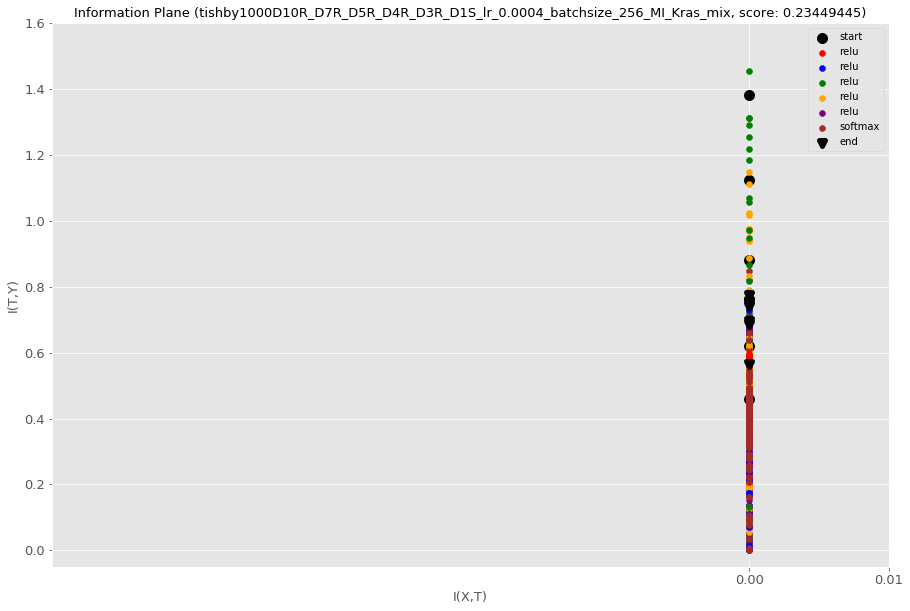

creating info plane epoch view plot


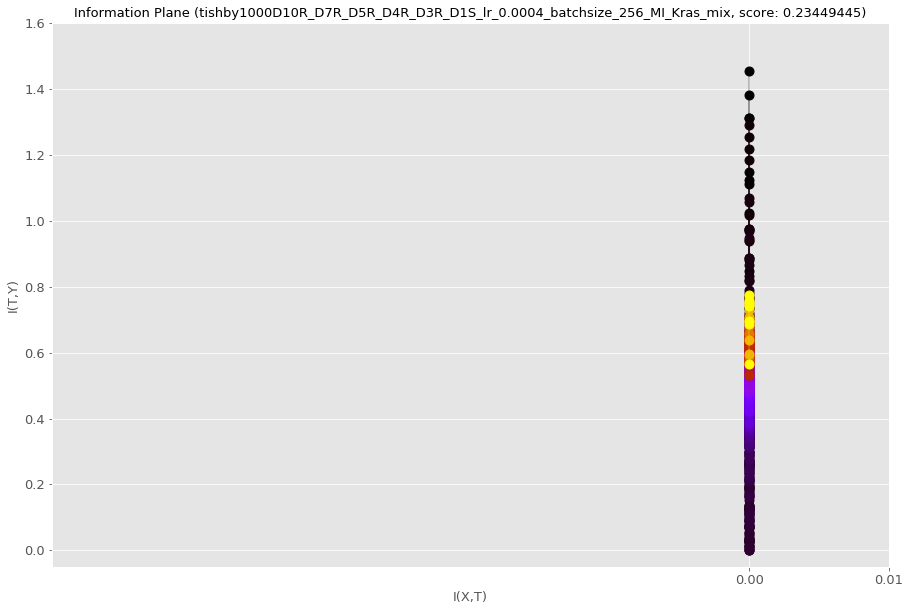

Creating combinationview plot


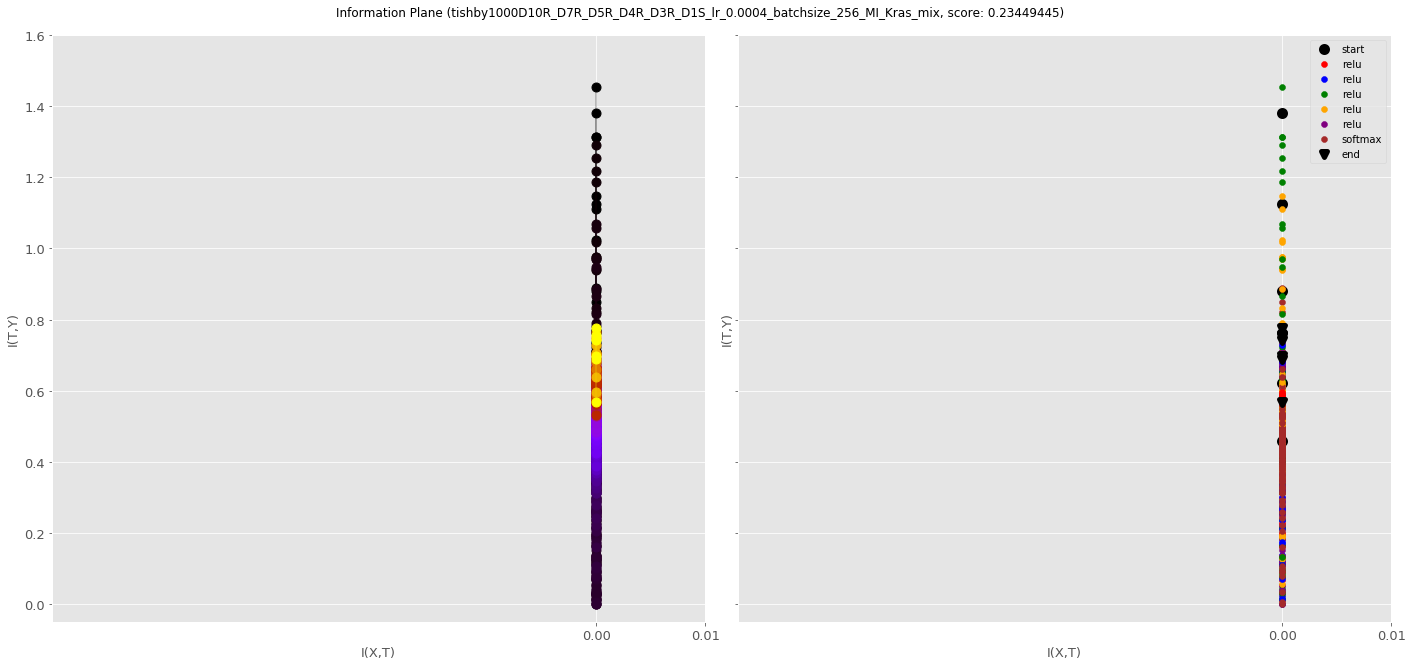

12371.628635732923

In [21]:
# Krasov mix proc
timeit.timeit(do_this6b, number = 1)

Starting Kraskov_cont calculation for MI in parallel
calculated Kraskov_cont MI_X in parallel
calculated Kraskov_cont MI_Y in parallel
creating info plane layer view plot


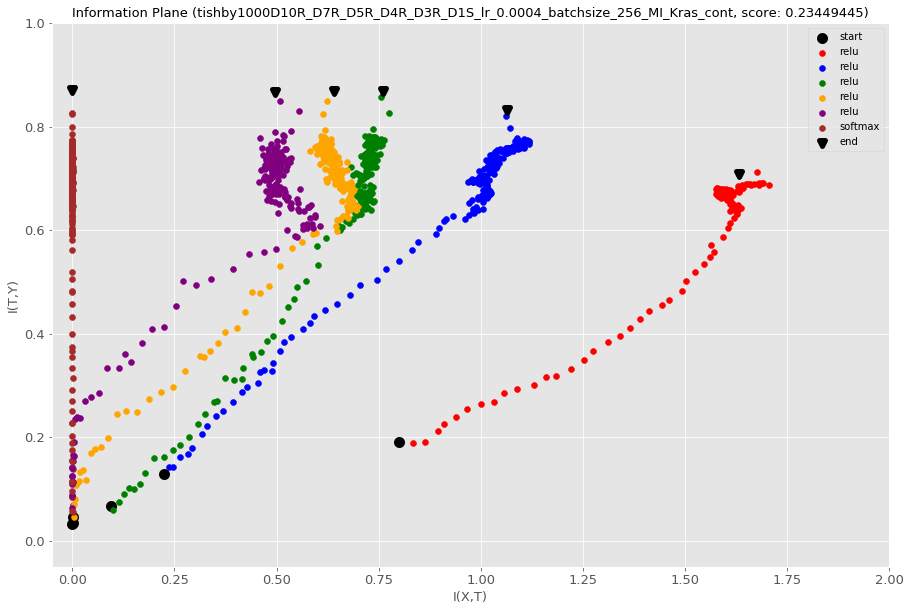

creating info plane epoch view plot


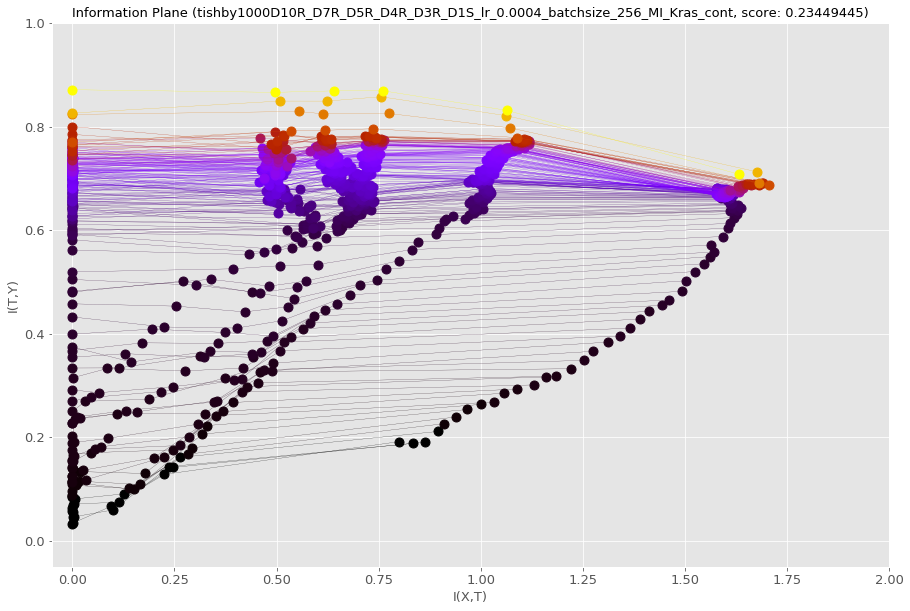

Creating combinationview plot


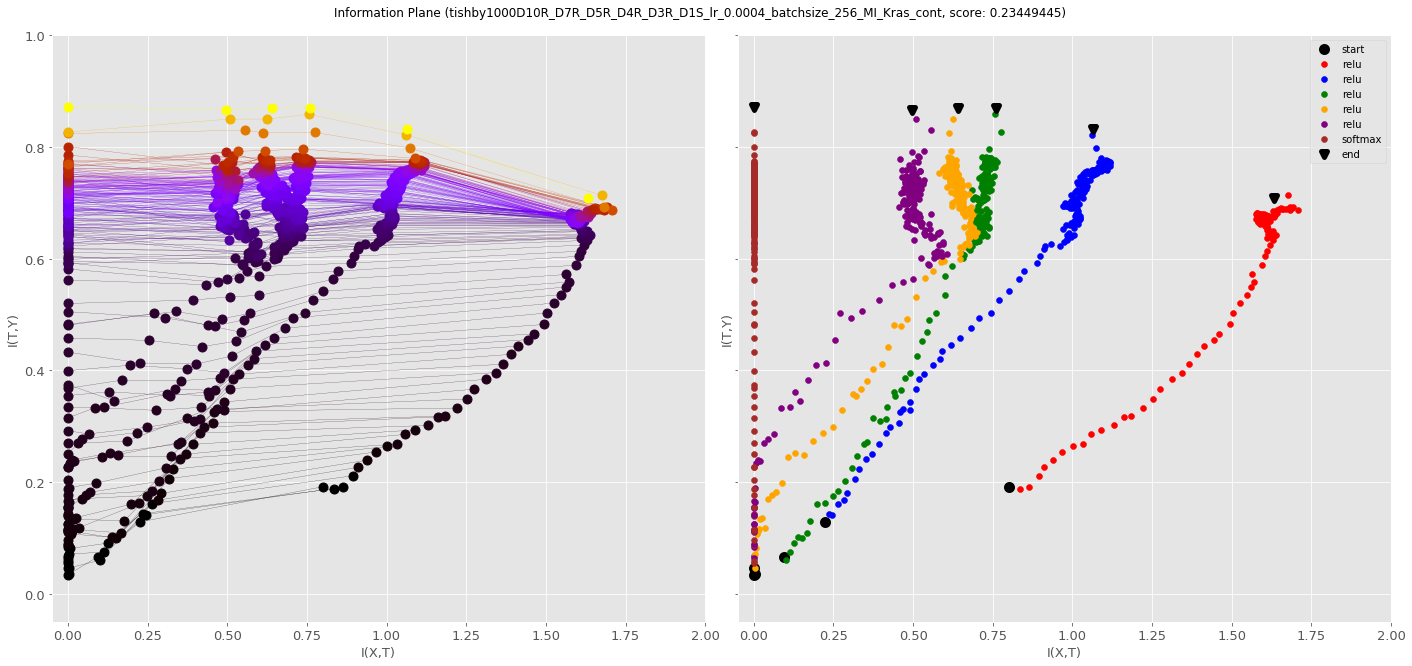

735.5253145061433

In [22]:
# Krasov cont par
timeit.timeit(do_this7, number = 1)

calculated Kraskov MI for (epoch, layer): (0, 0)
calculated Kraskov MI for (epoch, layer): (0, 1)
calculated Kraskov MI for (epoch, layer): (0, 2)
calculated Kraskov MI for (epoch, layer): (0, 3)
calculated Kraskov MI for (epoch, layer): (0, 4)
calculated Kraskov MI for (epoch, layer): (0, 5)
calculated Kraskov MI for (epoch, layer): (1, 0)
calculated Kraskov MI for (epoch, layer): (1, 1)
calculated Kraskov MI for (epoch, layer): (1, 2)
calculated Kraskov MI for (epoch, layer): (1, 3)
calculated Kraskov MI for (epoch, layer): (1, 4)
calculated Kraskov MI for (epoch, layer): (1, 5)
calculated Kraskov MI for (epoch, layer): (2, 0)
calculated Kraskov MI for (epoch, layer): (2, 1)
calculated Kraskov MI for (epoch, layer): (2, 2)
calculated Kraskov MI for (epoch, layer): (2, 3)
calculated Kraskov MI for (epoch, layer): (2, 4)
calculated Kraskov MI for (epoch, layer): (2, 5)
calculated Kraskov MI for (epoch, layer): (3, 0)
calculated Kraskov MI for (epoch, layer): (3, 1)
calculated Kraskov M

calculated Kraskov MI for (epoch, layer): (27, 4)
calculated Kraskov MI for (epoch, layer): (27, 5)
calculated Kraskov MI for (epoch, layer): (28, 0)
calculated Kraskov MI for (epoch, layer): (28, 1)
calculated Kraskov MI for (epoch, layer): (28, 2)
calculated Kraskov MI for (epoch, layer): (28, 3)
calculated Kraskov MI for (epoch, layer): (28, 4)
calculated Kraskov MI for (epoch, layer): (28, 5)
calculated Kraskov MI for (epoch, layer): (29, 0)
calculated Kraskov MI for (epoch, layer): (29, 1)
calculated Kraskov MI for (epoch, layer): (29, 2)
calculated Kraskov MI for (epoch, layer): (29, 3)
calculated Kraskov MI for (epoch, layer): (29, 4)
calculated Kraskov MI for (epoch, layer): (29, 5)
calculated Kraskov MI for (epoch, layer): (30, 0)
calculated Kraskov MI for (epoch, layer): (30, 1)
calculated Kraskov MI for (epoch, layer): (30, 2)
calculated Kraskov MI for (epoch, layer): (30, 3)
calculated Kraskov MI for (epoch, layer): (30, 4)
calculated Kraskov MI for (epoch, layer): (30, 5)


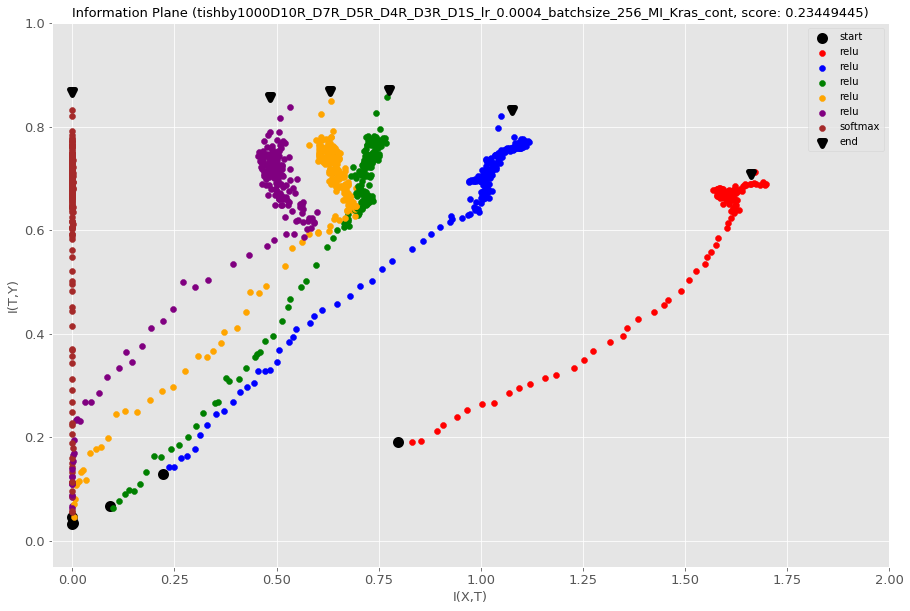

creating info plane epoch view plot


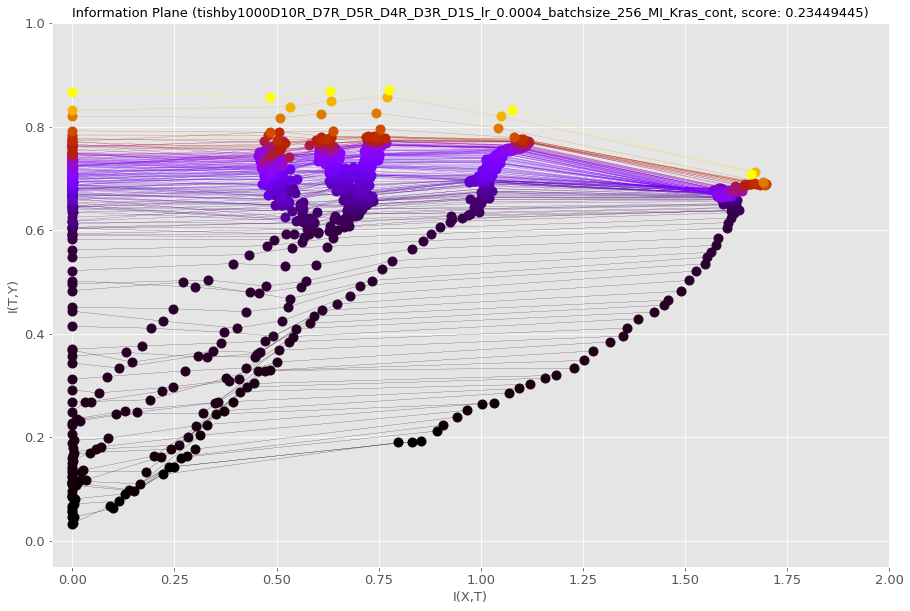

Creating combinationview plot


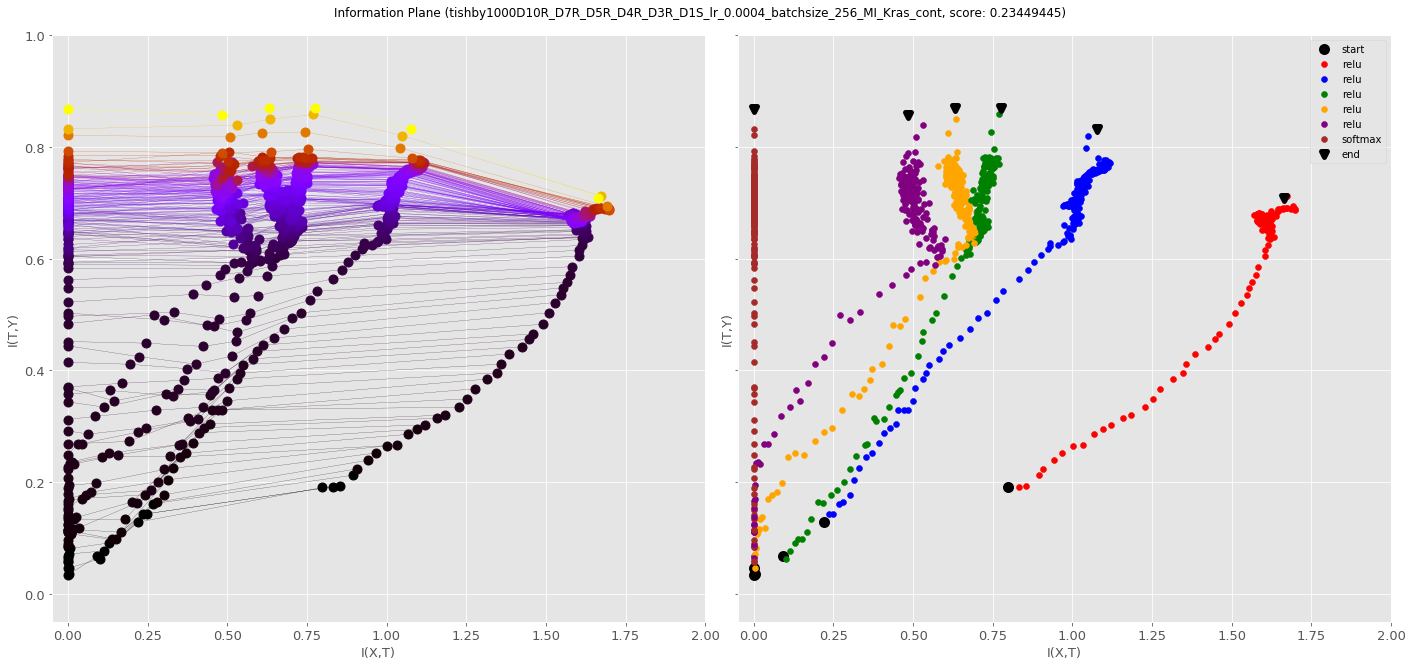

2289.840334038716

In [23]:
# Krasov cont par
timeit.timeit(do_this7b, number = 1)